### Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pickle

import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns',None)

Loading the dataset

In [2]:
columns=['Months_as_customer','Age','Policy_number', 'Bind_date','State','CSL','Deductable','Annual_premium','Umbrella_limit', 'ZIP','Sex', 'Education_level','Occupation', 'Hobbies','Relationship','Capital_gains','Capital_loss','Incident_date','Incident_type','Collision_type','Incident_severity', 'Authorities_contacted','Incident_state','Incident_city','Incident_location','Incident_hour_of_the_day', 'Number_of_vehicles_involved','Property_damage', 'Bodily_injuries','Witnesses','Police_report_available','Total_claim_amount','Injury_claim','Property_claim', 'Vehicle_claim','Auto_make','Auto_model','Auto_year','Fraud_reported','_c39']

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv',names=columns)

Creating a DataFrame

In [4]:
df=pd.DataFrame(data=data)

Checking the DataFrame

In [5]:
df

Months_as_customer  Age  Policy_number   Bind_date State       CSL  \
0                   328   48         521585  17-10-2014    OH   250/500   
1                   228   42         342868  27-06-2006    IN   250/500   
2                   134   29         687698  06-09-2000    OH   100/300   
3                   256   41         227811  25-05-1990    IL   250/500   
4                   228   44         367455  06-06-2014    IL  500/1000   
..                  ...  ...            ...         ...   ...       ...   
995                   3   38         941851  16-07-1991    OH  500/1000   
996                 285   41         186934  05-01-2014    IL   100/300   
997                 130   34         918516  17-02-2003    OH   250/500   
998                 458   62         533940  18-11-2011    IL  500/1000   
999                 456   60         556080  11-11-1996    OH   250/500   

     Deductable  Annual_premium  Umbrella_limit     ZIP     Sex  \
0          1000         1406.91               0  466132    MALE   
1          2000         1197.22         5000000  468176    MALE   
2          2000         1413.14         5000000  430632  FEMALE   
3          2000         1415.74         6000000  608117  FEMALE   
4          1000         1583.91         6000000  610706    MALE   
..          ...             ...             ...     ...     ...   
995        1000         1310.80               0  431289  FEMALE   
996        1000         1436.79               0  608177  FEMALE   
997         500         1383.49         3000000  442797  FEMALE   
998        2000         1356.92         5000000  441714    MALE   
999        1000          766.19               0  612260  FEMALE   

    Education_level         Occupation         Hobbies    Relationship  \
0                MD       craft-repair        sleeping         husband   
1                MD  machine-op-inspct         reading  other-relative   
2               PhD              sales     board-games       own-child   
3               PhD       armed-forces     board-games       unmarried   
4         Associate              sales     board-games       unmarried   
..              ...                ...             ...             ...   
995         Masters       craft-repair       paintball       unmarried   
996             PhD     prof-specialty        sleeping            wife   
997         Masters       armed-forces  bungie-jumping  other-relative   
998       Associate  handlers-cleaners    base-jumping            wife   
999       Associate              sales        kayaking         husband   

     Capital_gains  Capital_loss Incident_date             Incident_type  \
0            53300             0    25-01-2015  Single Vehicle Collision   
1                0             0    21-01-2015             Vehicle Theft   
2            35100             0    22-02-2015   Multi-vehicle Collision   
3            48900        -62400    10-01-2015  Single Vehicle Collision   
4            66000        -46000    17-02-2015             Vehicle Theft   
..             ...           ...           ...                       ...   
995              0             0    22-02-2015  Single Vehicle Collision   
996          70900             0    24-01-2015  Single Vehicle Collision   
997          35100             0    23-01-2015   Multi-vehicle Collision   
998              0             0    26-02-2015  Single Vehicle Collision   
999              0             0    26-02-2015                Parked Car   

      Collision_type Incident_severity Authorities_contacted Incident_state  \
0     Side Collision      Major Damage                Police             SC   
1                  ?      Minor Damage                Police             VA   
2     Rear Collision      Minor Damage                Police             NY   
3    Front Collision      Major Damage                Police             OH   
4                  ?      Minor Damage                   NaN             NY   
..               ...   

Checking the head of dataframe

In [6]:
df.head(10)

Months_as_customer  Age  Policy_number   Bind_date State       CSL  \
0                 328   48         521585  17-10-2014    OH   250/500   
1                 228   42         342868  27-06-2006    IN   250/500   
2                 134   29         687698  06-09-2000    OH   100/300   
3                 256   41         227811  25-05-1990    IL   250/500   
4                 228   44         367455  06-06-2014    IL  500/1000   
5                 256   39         104594  12-10-2006    OH   250/500   
6                 137   34         413978  04-06-2000    IN   250/500   
7                 165   37         429027  03-02-1990    IL   100/300   
8                  27   33         485665  05-02-1997    IL   100/300   
9                 212   42         636550  25-07-2011    IL   100/300   

   Deductable  Annual_premium  Umbrella_limit     ZIP     Sex Education_level  \
0        1000         1406.91               0  466132    MALE              MD   
1        2000         1197.22         5000000  468176    MALE              MD   
2        2000         1413.14         5000000  430632  FEMALE             PhD   
3        2000         1415.74         6000000  608117  FEMALE             PhD   
4        1000         1583.91         6000000  610706    MALE       Associate   
5        1000         1351.10               0  478456  FEMALE             PhD   
6        1000         1333.35               0  441716    MALE             PhD   
7        1000         1137.03               0  603195    MALE       Associate   
8         500         1442.99               0  601734  FEMALE             PhD   
9         500         1315.68               0  600983    MALE             PhD   

          Occupation         Hobbies    Relationship  Capital_gains  \
0       craft-repair        sleeping         husband          53300   
1  machine-op-inspct         reading  other-relative              0   
2              sales     board-games       own-child          35100   
3       armed-forces     board-games       unmarried          48900   
4              sales     board-games       unmarried          66000   
5       tech-support  bungie-jumping       unmarried              0   
6     prof-specialty     board-games         husband              0   
7       tech-support    base-jumping       unmarried              0   
8      other-service            golf       own-child              0   
9    priv-house-serv         camping            wife              0   

   Capital_loss Incident_date             Incident_type   Collision_type  \
0             0    25-01-2015  Single Vehicle Collision   Side Collision   
1             0    21-01-2015             Vehicle Theft                ?   
2             0    22-02-2015   Multi-vehicle Collision   Rear Collision   
3        -62400    10-01-2015  Single Vehicle Collision  Front Collision   
4        -46000    17-02-2015             Vehicle Theft                ?   
5             0    02-01-2015   Multi-vehicle Collision   Rear Collision   
6        -77000    13-01-2015   Multi-vehicle Collision  Front Collision   
7             0    27-02-2015   Multi-vehicle Collision  Front Collision   
8             0    30-01-2015  Single Vehicle Collision  Front Collision   
9        -39300    05-01-2015  Single Vehicle Collision   Rear Collision   

  Incident_severity Authorities_contacted Incident_state Incident_city  \
0      Major Damage                Police             SC      Columbus   
1      Minor Damage                Police             VA     Riverwood   
2      Minor Damage                Police             NY      Columbus   
3      Major Damage                Police             OH     Arlington   
4      Minor Damage                   NaN             NY     Arlington   
5      Major Damage                  Fire             SC     Arlington   
6      Minor Damage                Police             NY   Springfield   
7        Total Loss                Police             VA      Columbus   
8        Total Loss   

Checking the tail of the dataset

In [7]:
df.tail(10)

Months_as_customer  Age  Policy_number   Bind_date State       CSL  \
990                 286   43         663190  05-02-1994    IL   100/300   
991                 257   44         109392  12-07-2006    OH   100/300   
992                  94   26         215278  24-10-2007    IN   100/300   
993                 124   28         674570  08-12-2001    OH   250/500   
994                 141   30         681486  24-03-2007    IN  500/1000   
995                   3   38         941851  16-07-1991    OH  500/1000   
996                 285   41         186934  05-01-2014    IL   100/300   
997                 130   34         918516  17-02-2003    OH   250/500   
998                 458   62         533940  18-11-2011    IL  500/1000   
999                 456   60         556080  11-11-1996    OH   250/500   

     Deductable  Annual_premium  Umbrella_limit     ZIP     Sex  \
990         500         1564.43         3000000  477644  FEMALE   
991        1000         1280.88               0  433981    MALE   
992         500          722.66               0  433696    MALE   
993        1000         1235.14               0  443567    MALE   
994        1000         1347.04               0  430665    MALE   
995        1000         1310.80               0  431289  FEMALE   
996        1000         1436.79               0  608177  FEMALE   
997         500         1383.49         3000000  442797  FEMALE   
998        2000         1356.92         5000000  441714    MALE   
999        1000          766.19               0  612260  FEMALE   

    Education_level         Occupation         Hobbies    Relationship  \
990              MD     prof-specialty          movies       unmarried   
991              MD      other-service      basketball  other-relative   
992              MD    exec-managerial         camping         husband   
993              MD    exec-managerial         camping         husband   
994     High School              sales  bungie-jumping       own-child   
995         Masters       craft-repair       paintball       unmarried   
996             PhD     prof-specialty        sleeping            wife   
997         Masters       armed-forces  bungie-jumping  other-relative   
998       Associate  handlers-cleaners    base-jumping            wife   
999       Associate              sales        kayaking         husband   

     Capital_gains  Capital_loss Incident_date             Incident_type  \
990          77500        -32800    31-01-2015  Single Vehicle Collision   
991          59400        -32200    06-02-2015  Single Vehicle Collision   
992          50300             0    23-01-2015   Multi-vehicle Collision   
993              0        -32100    17-02-2015   Multi-vehicle Collision   
994              0        -82100    22-01-2015                Parked Car   
995              0             0    22-02-2015  Single Vehicle Collision   
996          70900             0    24-01-2015  Single Vehicle Collision   
997          35100             0    23-01-2015   Multi-vehicle Collision   
998              0             0    26-02-2015  Single Vehicle Collision   
999              0             0    26-02-2015                Parked Car   

      Collision_type Incident_severity Authorities_contacted Incident_state  \
990   Rear Collision      Minor Damage                  Fire             NY   
991   Rear Collision        Total Loss                 Other             WV   
992  Front Collision      Major Damage                  Fire             OH   
993   Side Collision        Total Loss                 Other             OH   
994                ?      Minor Damage                   NaN             SC   
995  Front Collision      Minor Damage                  Fire             NC   
996   Rear Collision      Major Damage                  Fire             SC   
997   Side Collision      Minor Damage                Police             NC   
998   Rear Collision      Major Damage                 Other             NY   

Checking the shape of the dataset

In [8]:
df.shape

(1000, 40)

- The dataset has 1000 rows and 40 columns.

Checking the dataset info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Months_as_customer           1000 non-null   int64  
 1   Age                          1000 non-null   int64  
 2   Policy_number                1000 non-null   int64  
 3   Bind_date                    1000 non-null   object 
 4   State                        1000 non-null   object 
 5   CSL                          1000 non-null   object 
 6   Deductable                   1000 non-null   int64  
 7   Annual_premium               1000 non-null   float64
 8   Umbrella_limit               1000 non-null   int64  
 9   ZIP                          1000 non-null   int64  
 10  Sex                          1000 non-null   object 
 11  Education_level              1000 non-null   object 
 12  Occupation                   1000 non-null   object 
 13  Hobbies            

- We can observe that 3 types data types in the dataset. i.e. object, integer and float.
- Null values can be observed in column Authorities_contacted. Also 100 percent null values observed in column _c39.
- ? as values can be observed some rows. Further analysis is required.
- We observe negative values present in the dataset. In column Capital_loss the values are in negatives. Hence we need to change it to positve values. We need to check for negative values.
- Columns Policy_number, ZIP, Hobbies, Incident_date looks like does not have much role in the prediction of Fraud_reported. Hence we can drop after further analysis.
- We need to predict if an insurance claim is fraudulent or not. Hence Fraud_reported is our target column.
- Since the target is a categorical column. Hence, we will create classification model to predict Insurane_Claim is fraudulent or not.

Checking for null values

In [10]:
df.isnull().sum()

Months_as_customer                0
Age                               0
Policy_number                     0
Bind_date                         0
State                             0
CSL                               0
Deductable                        0
Annual_premium                    0
Umbrella_limit                    0
ZIP                               0
Sex                               0
Education_level                   0
Occupation                        0
Hobbies                           0
Relationship                      0
Capital_gains                     0
Capital_loss                      0
Incident_date                     0
Incident_type                     0
Collision_type                    0
Incident_severity                 0
Authorities_contacted            91
Incident_state                    0
Incident_city                     0
Incident_location                 0
Incident_hour_of_the_day          0
Number_of_vehicles_involved       0
Property_damage             

Checking the percentage of null values

In [11]:
df.isnull().mean()*100

Months_as_customer               0.0
Age                              0.0
Policy_number                    0.0
Bind_date                        0.0
State                            0.0
CSL                              0.0
Deductable                       0.0
Annual_premium                   0.0
Umbrella_limit                   0.0
ZIP                              0.0
Sex                              0.0
Education_level                  0.0
Occupation                       0.0
Hobbies                          0.0
Relationship                     0.0
Capital_gains                    0.0
Capital_loss                     0.0
Incident_date                    0.0
Incident_type                    0.0
Collision_type                   0.0
Incident_severity                0.0
Authorities_contacted            9.1
Incident_state                   0.0
Incident_city                    0.0
Incident_location                0.0
Incident_hour_of_the_day         0.0
Number_of_vehicles_involved      0.0
P

- We can observe that only 2 columns has null values present i.e. Authorities_contacted and _c39.
- The column _c39 has 100 percent null values. Hence, we can drop it.
- Column Authorities_contacted has 9.1 percent null values.

Dropping column Fraud_reported                 

In [12]:
df.drop('_c39', axis=1,inplace=True)

Removing null from Authorities_contacted column

Checking the unique values of Authorities_contacted

In [13]:
df['Authorities_contacted'].unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

- We can observe 4 categories of data i.e. Police, Fire, Other., Ambulance.
- We will replace nan values with Other.

Replacing nan values with Other

In [14]:
df['Authorities_contacted']=df['Authorities_contacted'].fillna('Other')

- Nan values has been replace with Other

Checking the presence of value ? in the dataset

In [15]:
question_mark_count=(df=='?').sum()
question_mark_count

Months_as_customer               0
Age                              0
Policy_number                    0
Bind_date                        0
State                            0
CSL                              0
Deductable                       0
Annual_premium                   0
Umbrella_limit                   0
ZIP                              0
Sex                              0
Education_level                  0
Occupation                       0
Hobbies                          0
Relationship                     0
Capital_gains                    0
Capital_loss                     0
Incident_date                    0
Incident_type                    0
Collision_type                 178
Incident_severity                0
Authorities_contacted            0
Incident_state                   0
Incident_city                    0
Incident_location                0
Incident_hour_of_the_day         0
Number_of_vehicles_involved      0
Property_damage                360
Bodily_injuries     

- We can observe 3 columns where ? is present i.e. Collision_type, Property_damage, Police_report_available.
- All these 3 columns are object types. 

Checking the unique values of Collision_type

In [16]:
df['Collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [17]:
df['Collision_type'].value_counts()

Collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64

- We can observe that there are 178 value counts of ?. 

Checking collision type with incident type

In [18]:
incident_type_collision_type_group=df.groupby('Collision_type')['Incident_type'].unique()
incident_type_collision_type_group['?']

array(['Vehicle Theft', 'Parked Car'], dtype=object)

- We can observe that there are 2 types of incedent type where Collision_type is ? i.e. Vehicle Theft and Parked Car.

Checking all the unique values of Collision_type where Incident_type is Vehicle Theft and Parked Car

In [19]:
df[df['Incident_type']==('Vehicle Theft' and 'Parked Car')]['Collision_type'].unique()

array(['?'], dtype=object)

- We can observe that for Incident_type as Vehicle Theft or Parked Car, the Collision_type is ?.
- Hence we will replace it with by creating a new category as Other.

Replacing ? with Other in Collision_type column

In [20]:
df['Collision_type']=df['Collision_type'].str.replace('?','Other')

Checking the unique values of Property_damage

In [21]:
df['Property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

Checking value counts of Property_damage

In [22]:
df['Property_damage'].value_counts()

Property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

- We can observe that 360 counts of property damage is ?.
- Hence we will replace it new category as Unknown.

Replacing ? with Unknown in Property_damage

In [23]:
df['Property_damage']=df['Property_damage'].str.replace('?','Unknown')

Checking the unique values of Police_report_available

In [24]:
df['Police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

Checking the value_counts of Police_report_available

In [25]:
df['Police_report_available'].value_counts()

Police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

- We can observe that 343 counts of Police_report_available is ?.
- Hence we will replace it new category as Unknown.

Replacing ? with Unknown in Police_report_available column

In [26]:
df['Police_report_available']=df['Police_report_available'].str.replace('?','Unknown')

- The ? values from all the 3 columns are replaced.

Checking for empty space in any rows

In [27]:
empty_space_check=(df==' ').sum()
empty_space_check

Months_as_customer             0
Age                            0
Policy_number                  0
Bind_date                      0
State                          0
CSL                            0
Deductable                     0
Annual_premium                 0
Umbrella_limit                 0
ZIP                            0
Sex                            0
Education_level                0
Occupation                     0
Hobbies                        0
Relationship                   0
Capital_gains                  0
Capital_loss                   0
Incident_date                  0
Incident_type                  0
Collision_type                 0
Incident_severity              0
Authorities_contacted          0
Incident_state                 0
Incident_city                  0
Incident_location              0
Incident_hour_of_the_day       0
Number_of_vehicles_involved    0
Property_damage                0
Bodily_injuries                0
Witnesses                      0
Police_rep

- No empty space is present in any columns.

Seperating numerical and categorical columns

In [28]:
num_columns=[column for column in df.columns if df[column].dtypes!='O']
cat_columns=[column for column in df.columns if df[column].dtypes=='O']

Checking for the presence of negative values in each columns

In [29]:
negative_values_check=(df[num_columns]<0).sum()
negative_values_check

Months_as_customer               0
Age                              0
Policy_number                    0
Deductable                       0
Annual_premium                   0
Umbrella_limit                   1
ZIP                              0
Capital_gains                    0
Capital_loss                   525
Incident_hour_of_the_day         0
Number_of_vehicles_involved      0
Bodily_injuries                  0
Witnesses                        0
Total_claim_amount               0
Injury_claim                     0
Property_claim                   0
Vehicle_claim                    0
Auto_year                        0
dtype: int64

- We observe that negative values are present in columns Umbrella_limit and Capital_loss.
- Hence we will convert it to positive values.

Replacing negative values of Capital_loss to positive

In [30]:
df['Umbrella_limit']=np.abs(df['Umbrella_limit'])
df['Capital_loss']=np.abs(df['Capital_loss'])

Statistical analysis of numerical columns

In [31]:
pd.options.display.float_format = '{:.2f}'.format
df[num_columns].describe().T

count       mean        std       min       25%  \
Months_as_customer          1000.00     203.95     115.11      0.00    115.75   
Age                         1000.00      38.95       9.14     19.00     32.00   
Policy_number               1000.00  546238.65  257063.01 100804.00 335980.25   
Deductable                  1000.00    1136.00     611.86    500.00    500.00   
Annual_premium              1000.00    1256.41     244.17    433.33   1089.61   
Umbrella_limit              1000.00 1103000.00 2296446.09      0.00      0.00   
ZIP                         1000.00  501214.49   71701.61 430104.00 448404.50   
Capital_gains               1000.00   25126.10   27872.19      0.00      0.00   
Capital_loss                1000.00   26793.70   28104.10      0.00      0.00   
Incident_hour_of_the_day    1000.00      11.64       6.95      0.00      6.00   
Number_of_vehicles_involved 1000.00       1.84       1.02      1.00      1.00   
Bodily_injuries             1000.00       0.99       0.82      0.00      0.00   
Witnesses                   1000.00       1.49       1.11      0.00      1.00   
Total_claim_amount          1000.00   52761.94   26401.53    100.00  41812.50   
Injury_claim                1000.00    7433.42    4880.95      0.00   4295.00   
Property_claim              1000.00    7399.57    4824.73      0.00   4445.00   
Vehicle_claim               1000.00   37928.95   18886.25     70.00  30292.50   
Auto_year                   1000.00    2005.10       6.02   1995.00   2000.00   

                                  50%       75%         max  
Months_as_customer             199.50    276.25      479.00  
Age                             38.00     44.00       64.00  
Policy_number               533135.00 759099.75   999435.00  
Deductable                    1000.00   2000.00     2000.00  
Annual_premium                1257.20   1415.70     2047.59  
Umbrella_limit                   0.00      0.00 10000000.00  
ZIP                         466445.50 603251.00   620962.00  
Capital_gains                    0.00  51025.00   100500.00  
Capital_loss                 23250.00  51500.00   111100.00  
Incident_hour_of_the_day        12.00     17.00       23.00  
Number_of_vehicles_involved      1.00      3.00        4.00  
Bodily_injuries                  1.00      2.00        2.00  
Witnesses                        1.00      2.00        3.00  
Total_claim_amount           58055.00  70592.50   114920.00  
Injury_claim                  6775.00  11305.00    21450.00  
Property_claim                6750.00  10885.00    23670.00  
Vehicle_claim                42100.00  50822.50    79560.00  
Auto_year                     2005.00   2010.00     2015.00

- We can observe skewness in columns Deductable, Capital_gains, Capital_loss, Injury_claim, Property_claim, Vehicle_claim.
- We can observe presence of outliers in columns Umbrella_limit, Capital_gains, Capital_loss, Total_claim_amount. 

Statistical analysis of categorical columns

In [32]:
df[cat_columns].describe().T

count unique                      top freq
Bind_date                1000    951               01-01-2006    3
State                    1000      3                       OH  352
CSL                      1000      3                  250/500  351
Sex                      1000      2                   FEMALE  537
Education_level          1000      7                       JD  161
Occupation               1000     14        machine-op-inspct   93
Hobbies                  1000     20                  reading   64
Relationship             1000      6                own-child  183
Incident_date            1000     60               02-02-2015   28
Incident_type            1000      4  Multi-vehicle Collision  419
Collision_type           1000      4           Rear Collision  292
Incident_severity        1000      4             Minor Damage  354
Authorities_contacted    1000      4                   Police  292
Incident_state           1000      7                       NY  262
Incident_city            1000      7              Springfield  157
Incident_location        1000   1000           9935 4th Drive    1
Property_damage          1000      3                  Unknown  360
Police_report_available  1000      3                  Unknown  343
Auto_make                1000     14                     Saab   80
Auto_model               1000     39                      RAM   43
Fraud_reported           1000      2                        N  753

- Columns Bind_date and Incident_location has very unique values. These 2 columns has not much in prediction of Insurane_Claim. Hence we can drop these columns.

Dropping column Bind_date and Incident_location

In [33]:
df.drop('Bind_date',axis=1,inplace=True)
df.drop('Incident_location',axis=1,inplace=True)

#### Data Visualization

Seperating revised numerical and categorical columns

In [34]:
num_columns=[column for column in df.columns if df[column].dtypes!='O']
cat_columns=[column for column in df.columns if df[column].dtypes=='O']

Univariate analysis

Visualize categorical columns using count plot

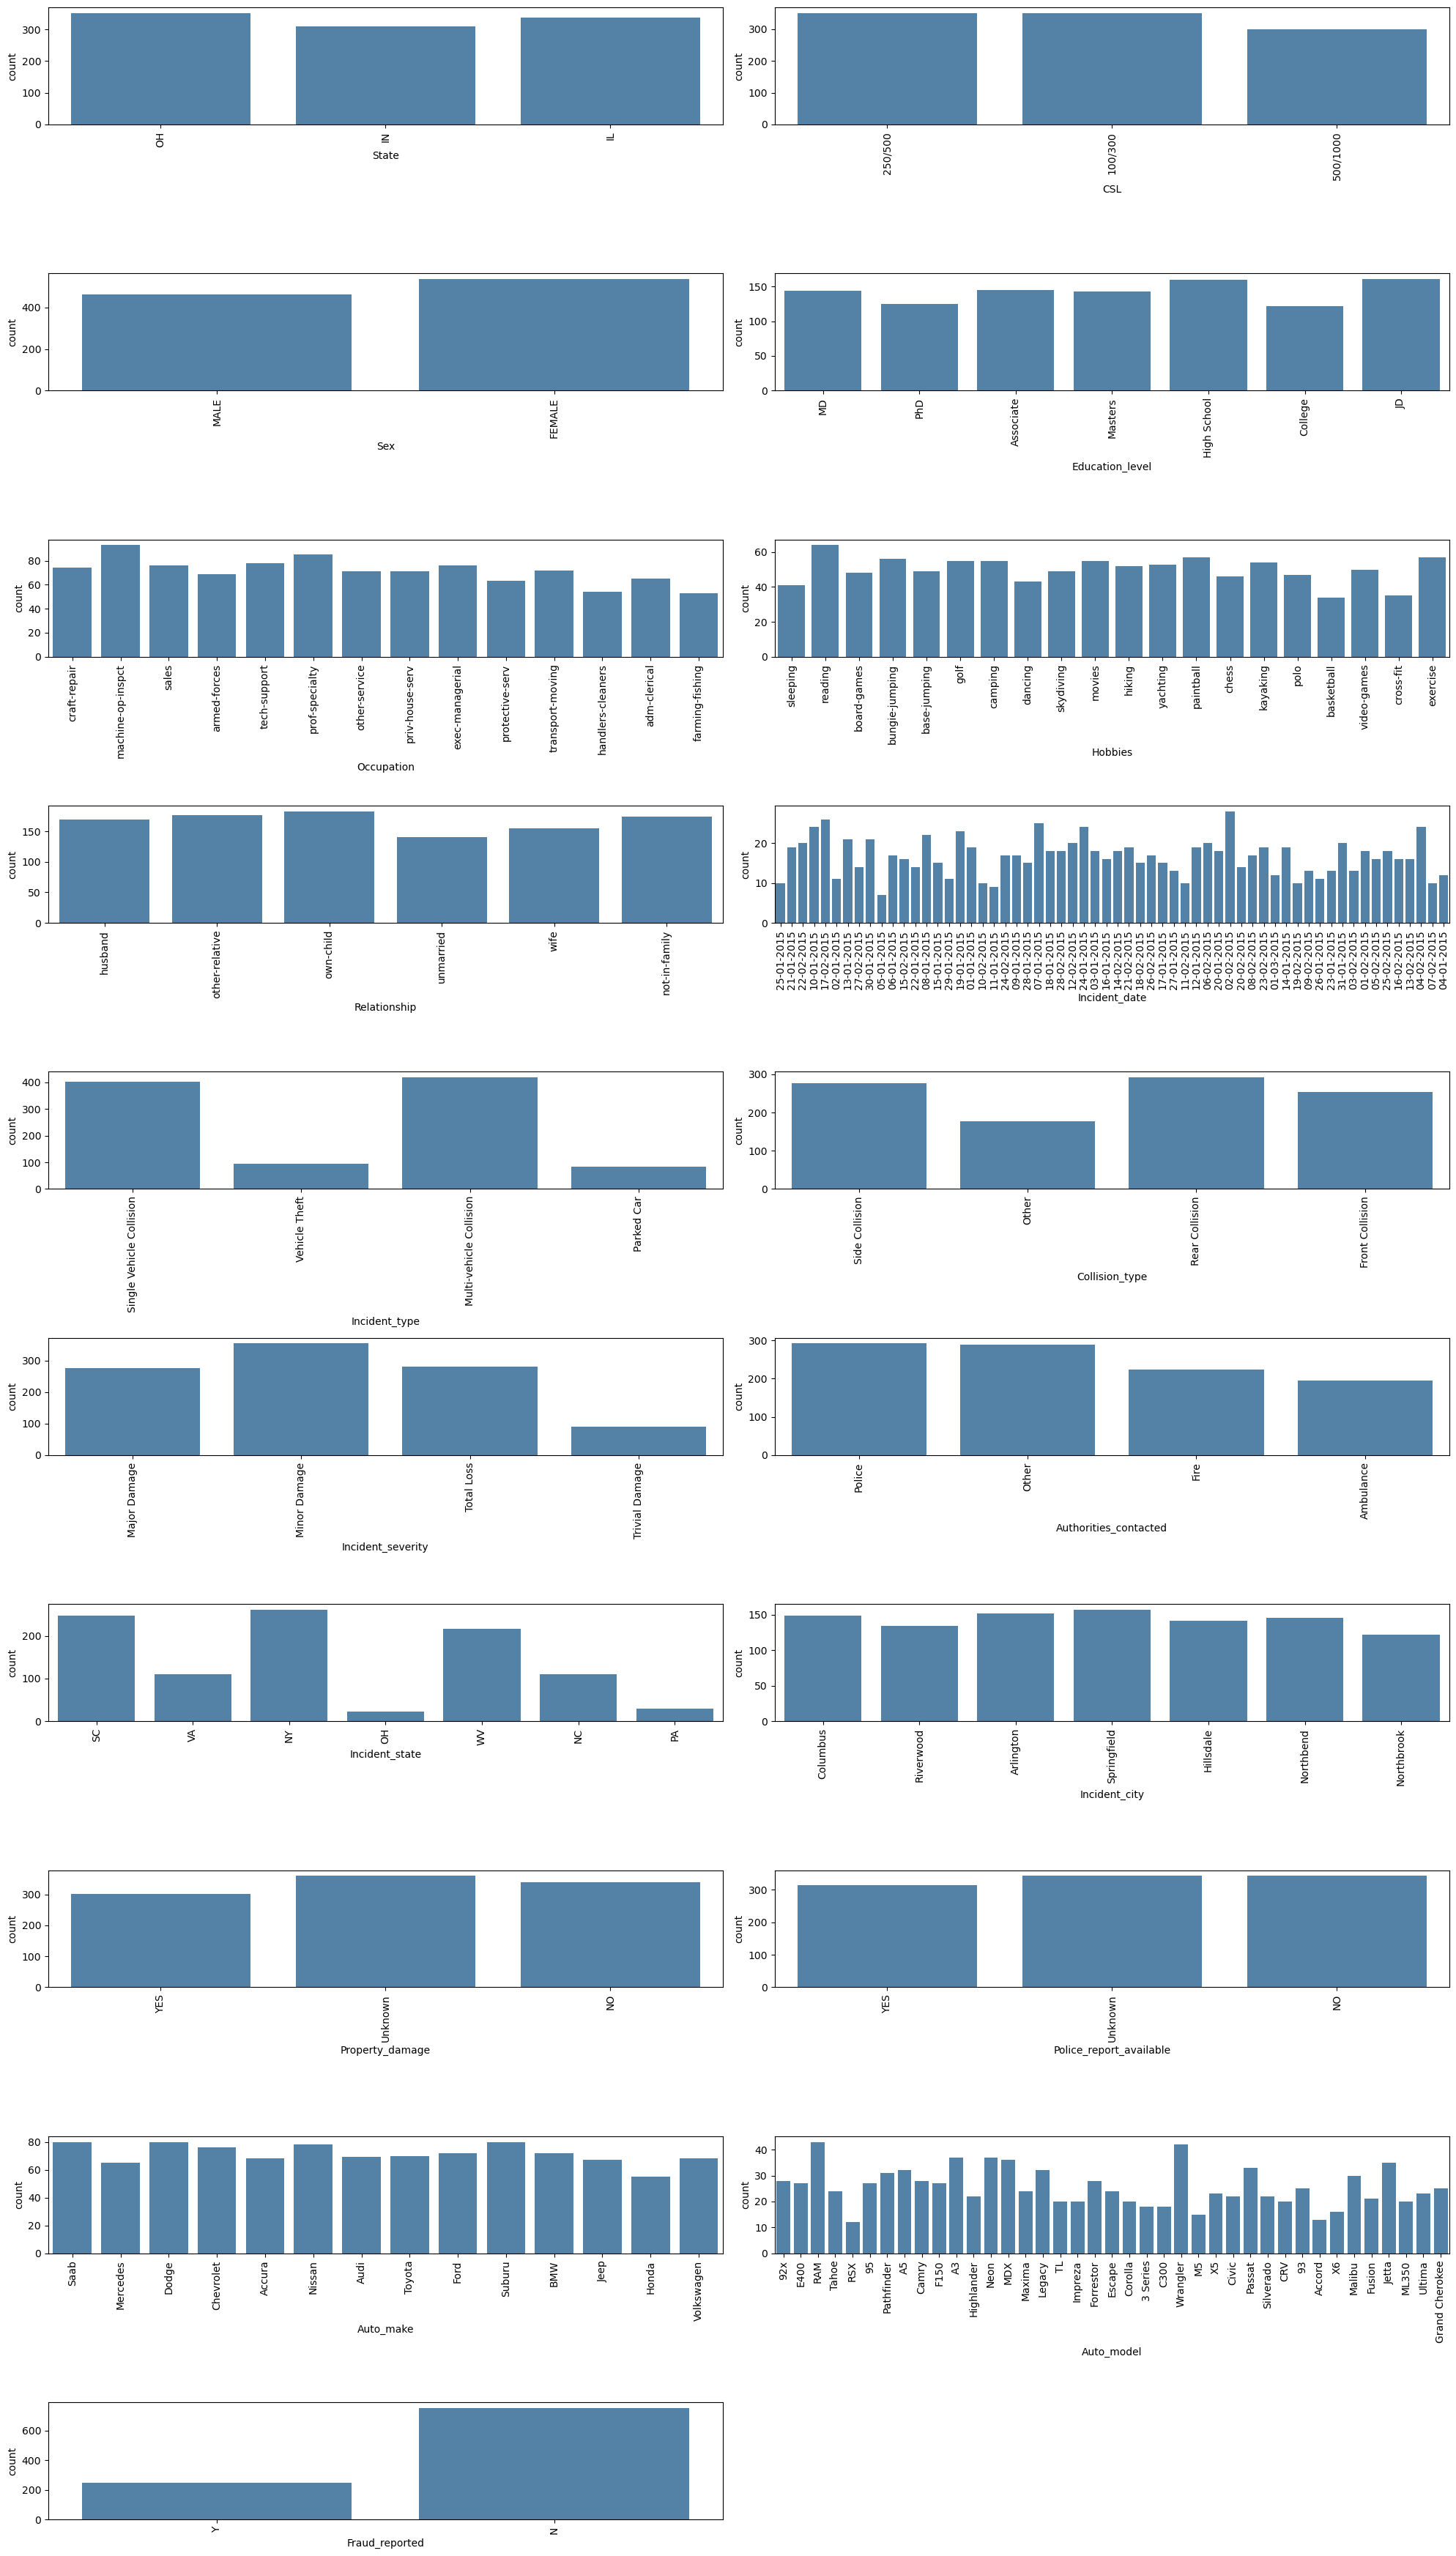

In [35]:
plt.figure(figsize=(20,35))
for index,column in enumerate(cat_columns):
    if index<=len(cat_columns):
        plt.subplot((len(cat_columns)+1)//2,2,index+1)
        sns.countplot(x=column,data=df,color='Steelblue',linewidth=.1)
        plt.xlabel(column)
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- In columns State,CSL, Sex, Eduction_level, Occupation, Hobbies, Relationship, Collision_type, Authorities_contacted, Incident_city, Auto_make, Auto_model the count of categories are almost evenly distributed. Hence, not baisedness is observed.
- The target column Insurance_Claim is very biased. The count of Yes is very low compared to No count.
- In column Incident_state, OH and PA has the least counts.
- Vehicle Theft and Parked Car has the least count of Incident_type.

Visualize numerical columns using histplot

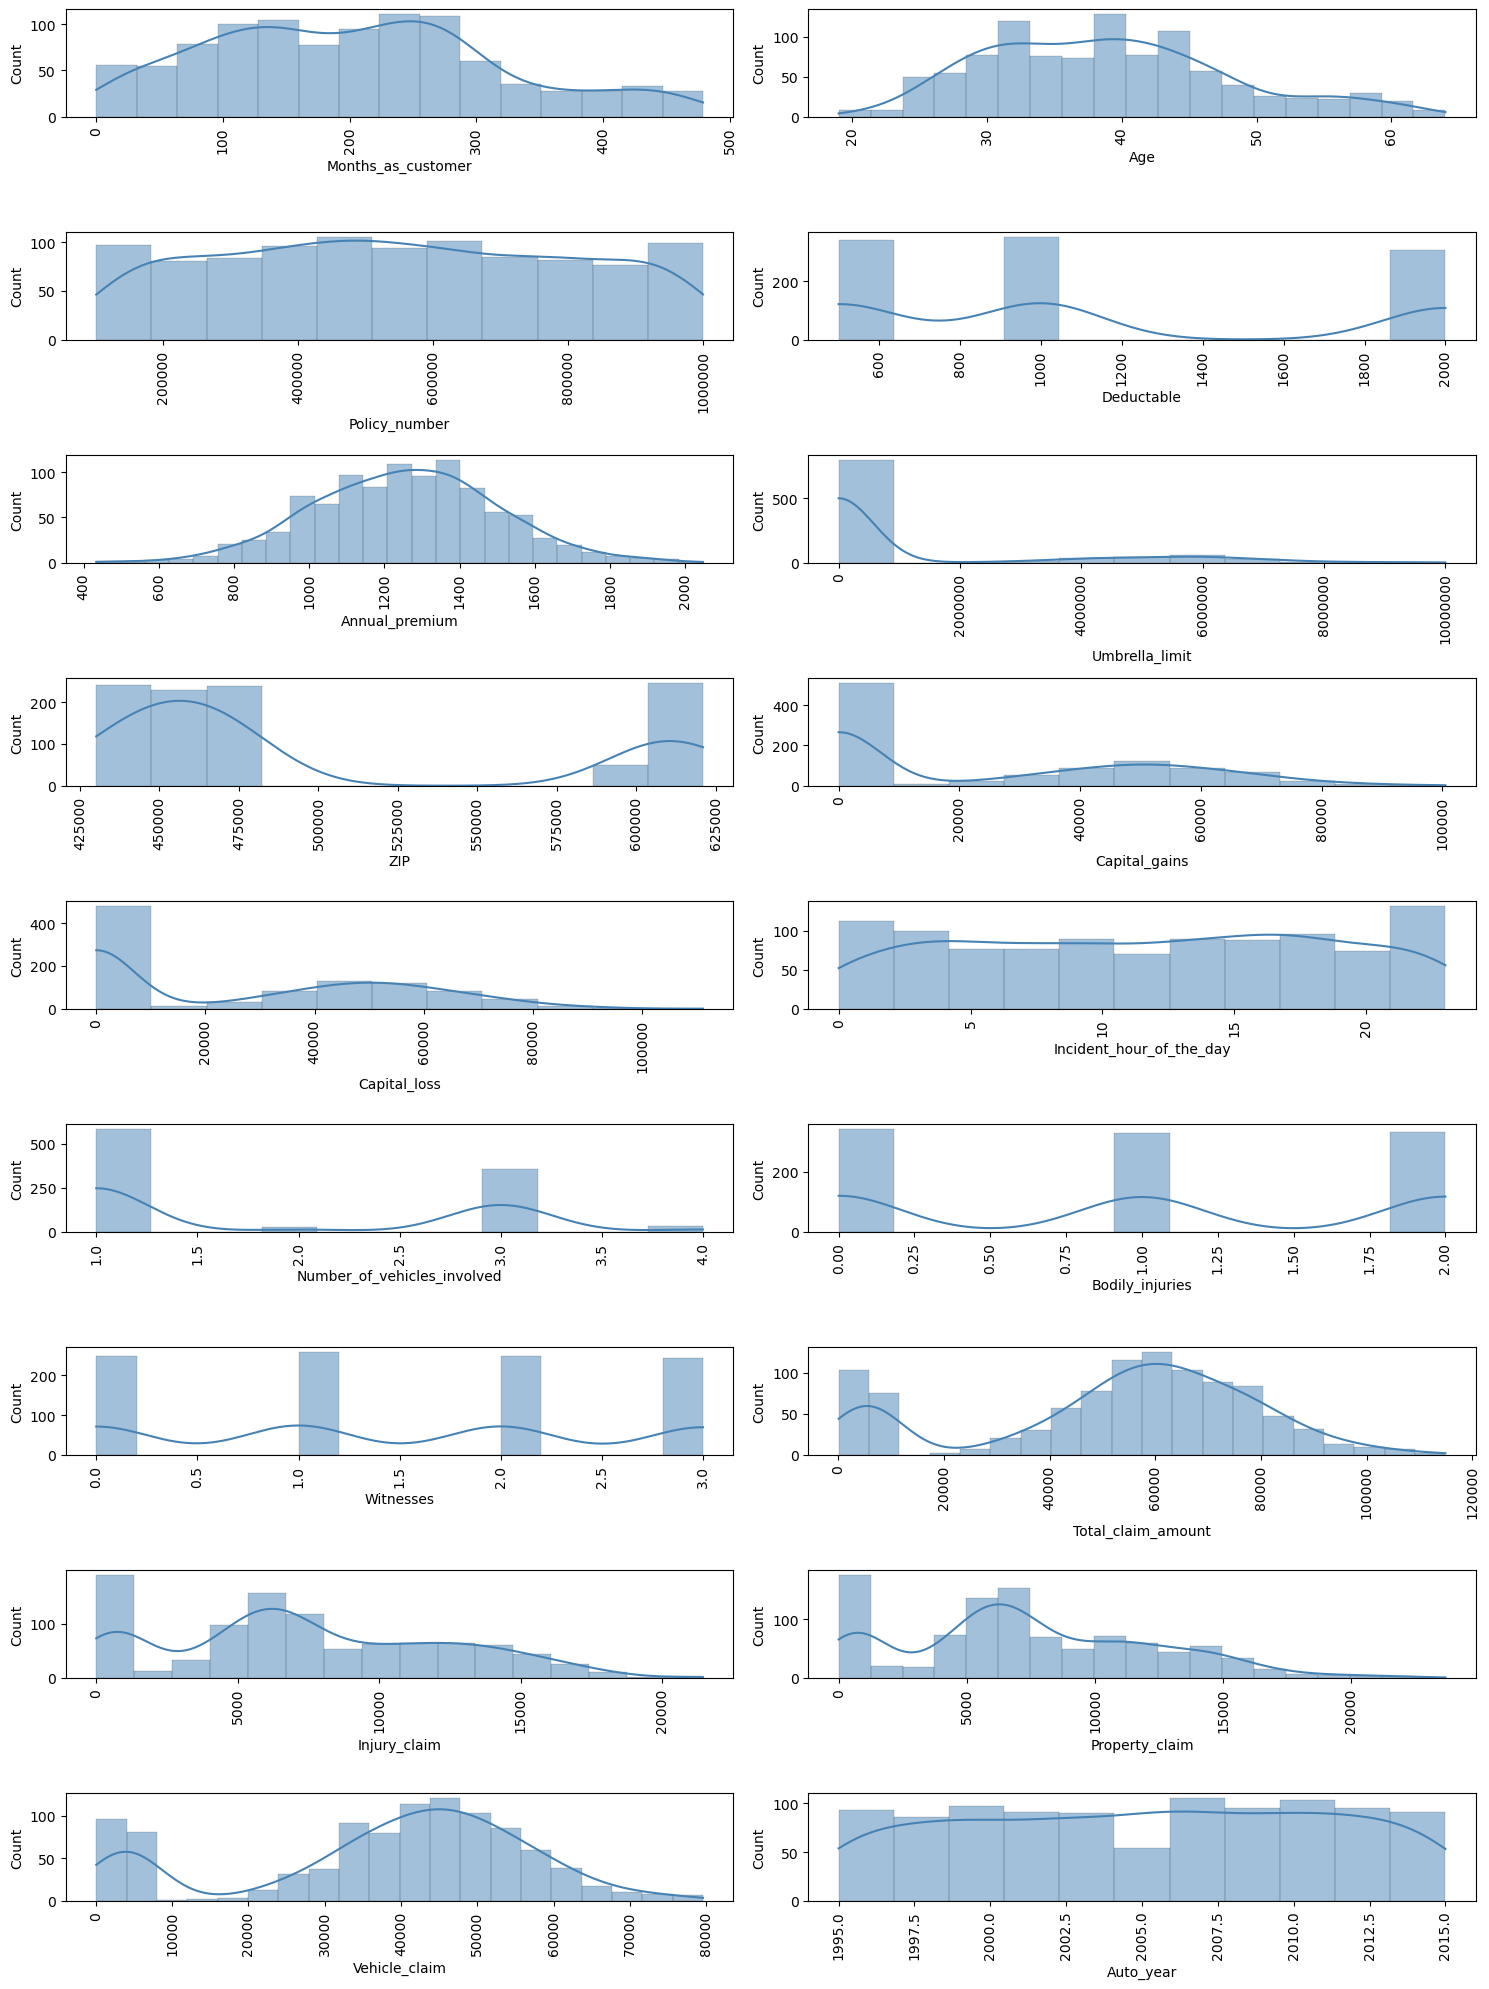

In [36]:
plt.figure(figsize=(15,20))
for index,column in enumerate(num_columns):
    if index<=len(num_columns):
        plt.subplot((len(num_columns)+1)//2,2,index+1)
        sns.histplot(x=column,linewidth=.1,color='Steelblue',kde=True,data=df)
        plt.xlabel(column)
        plt.ticklabel_format(style='plain',axis='x')
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Columns Annual_premium, Incident_hour_of_the_day, Bodily_injuries, Witnesses, Total_claim_amount, Vehicle_claim and Auto_Year appears normally distributed.
- Columns Umbrella_limited, Capital_gain, Capital_loss, Injury_claim, Property_claim appears right skewed.

Multivariate analysis

Visualising categorical columns with Fraud_reported using count plot

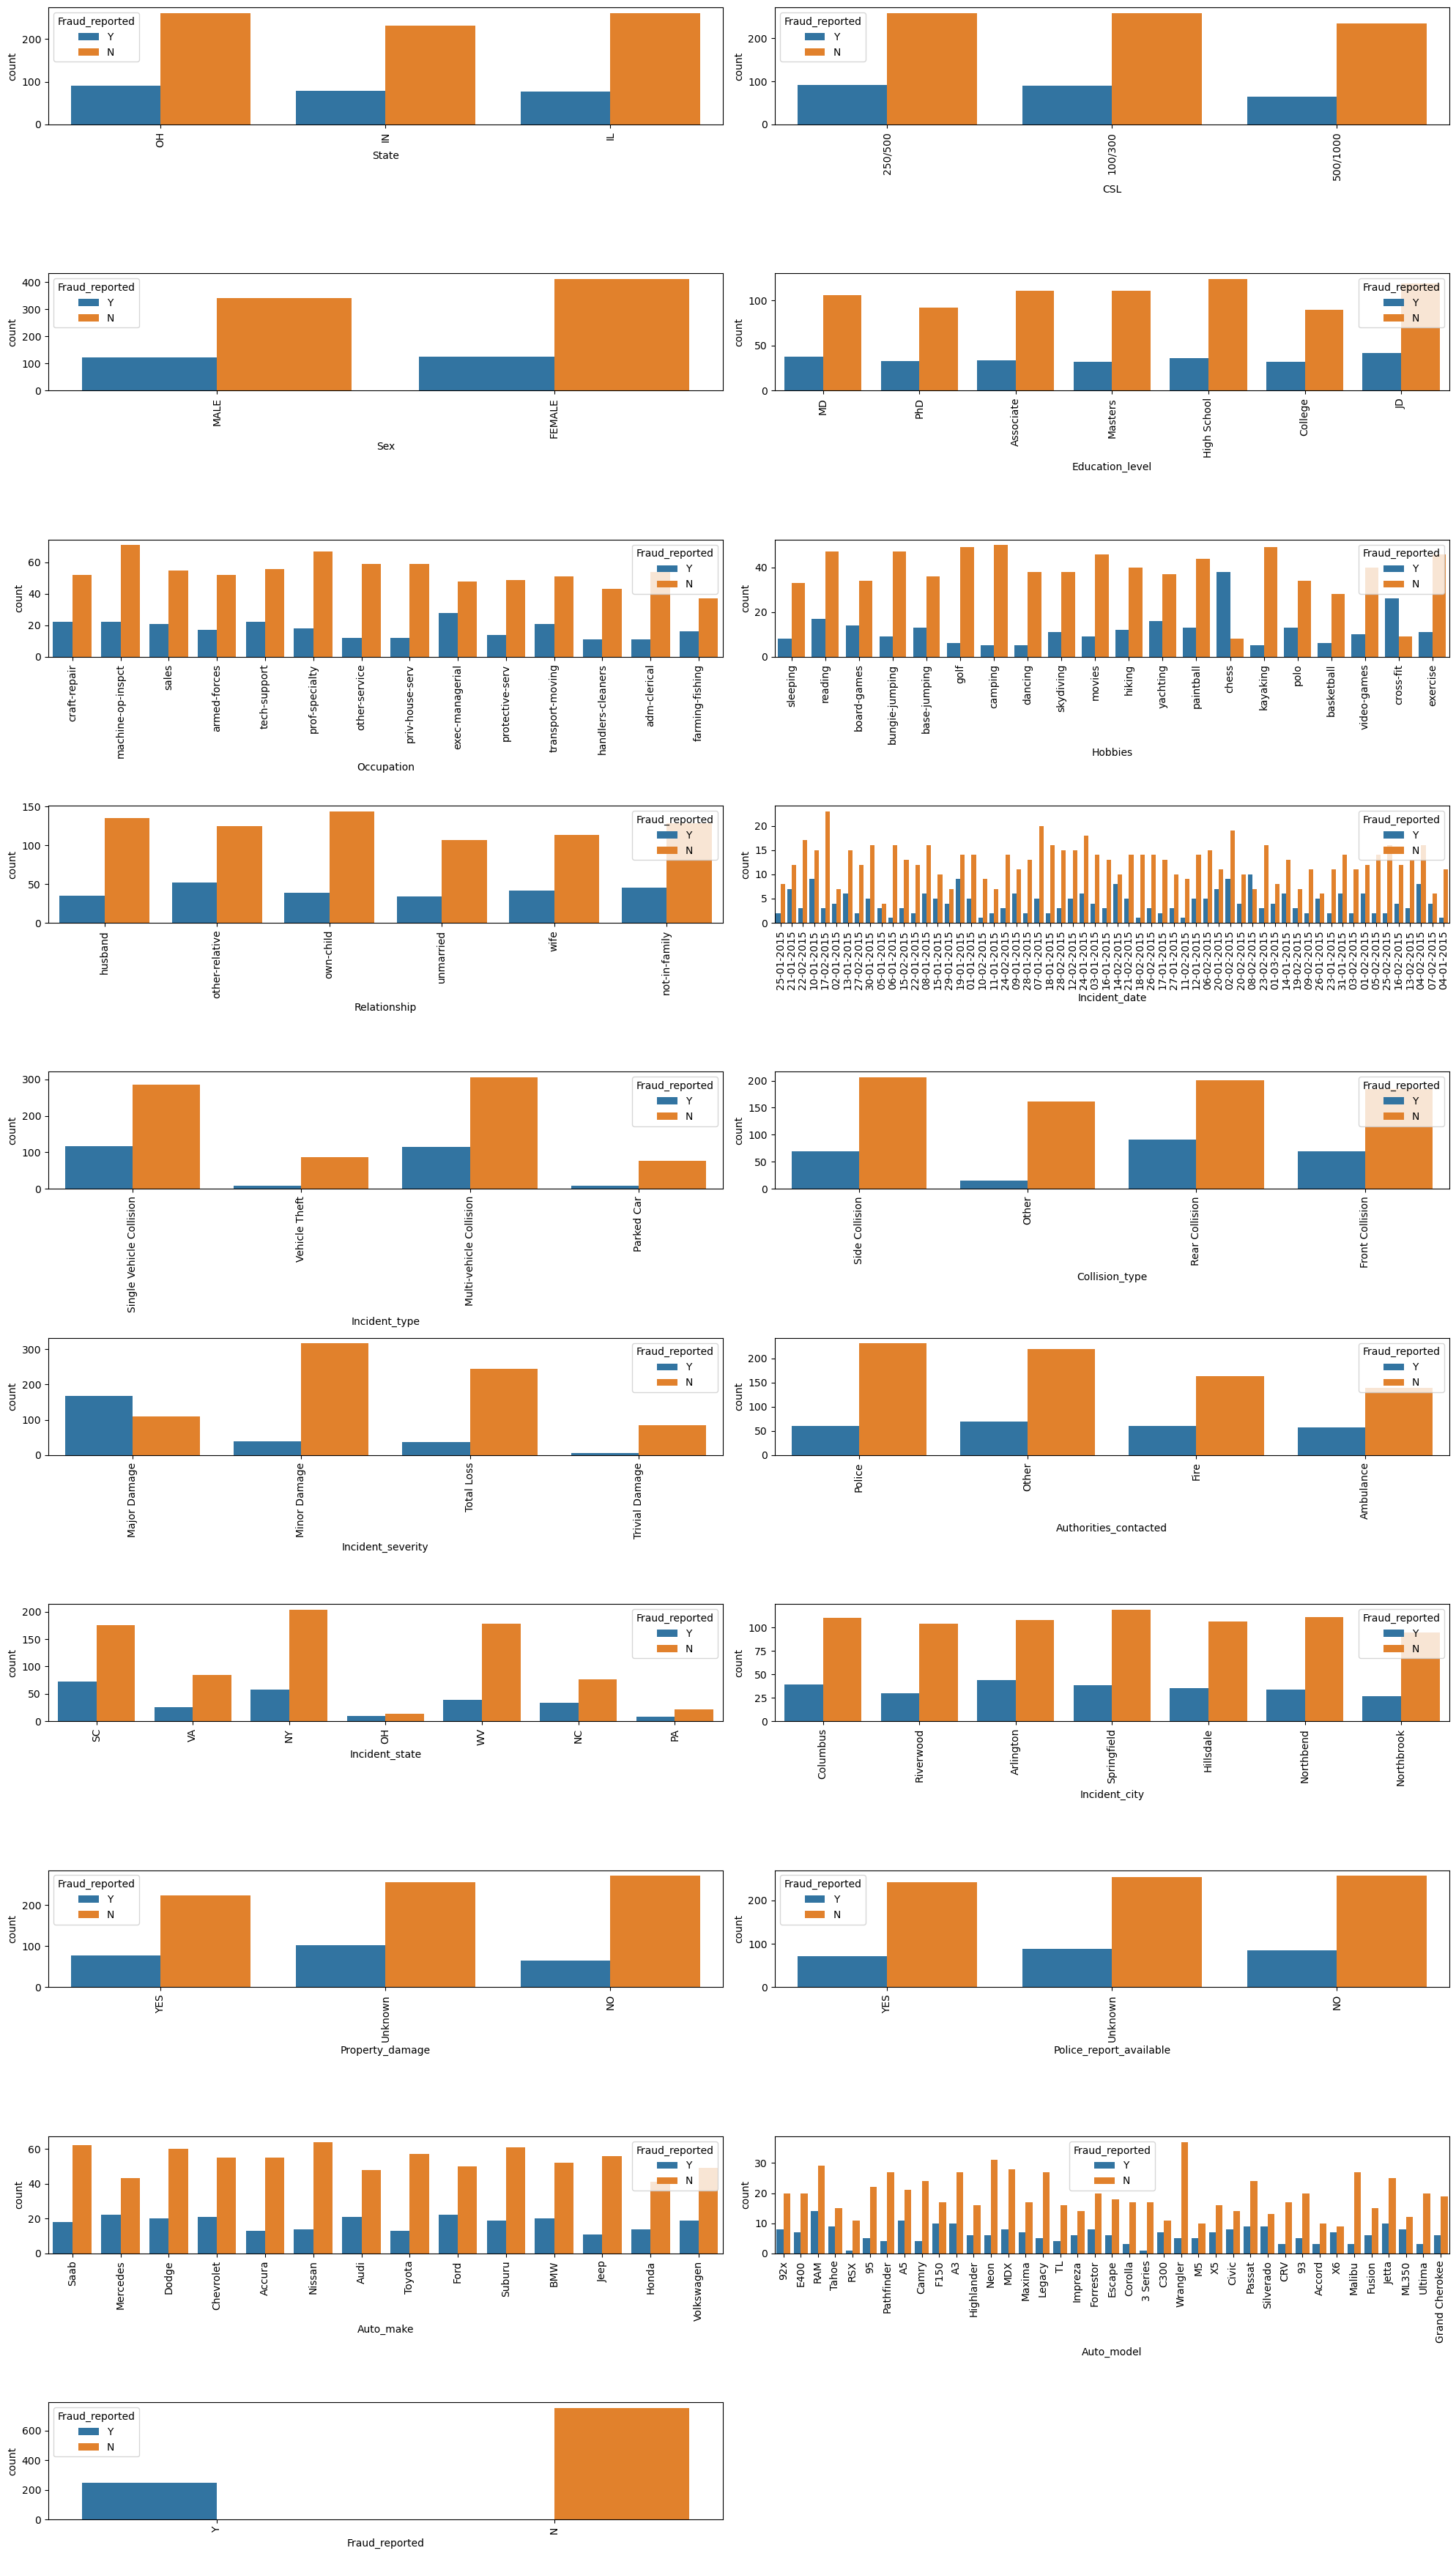

In [37]:
plt.figure(figsize=(20,35))
for index,column in enumerate(cat_columns):
    if index<=len(cat_columns):
        plt.subplot((len(cat_columns)+1)//2,2,index+1)
        sns.countplot(x=column,hue='Fraud_reported',data=df,linewidth=.1)
        plt.xlabel(column)
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- We can observe that the count of No categories of Fraud_reported is much higher than Yes for all columms.
- The count ratio of Yes to No amoung all categories is almost same for columns State, CSL, Sex, Education_level, Occupation, Relationship, Authorities_contacted, Incident_city, Property_demage, Police_report_available, Auto_make. 
- Insured person whose hobbies are chess and cross-fit has high count of fraud reported comapred to No count. 

Multivariate analysis

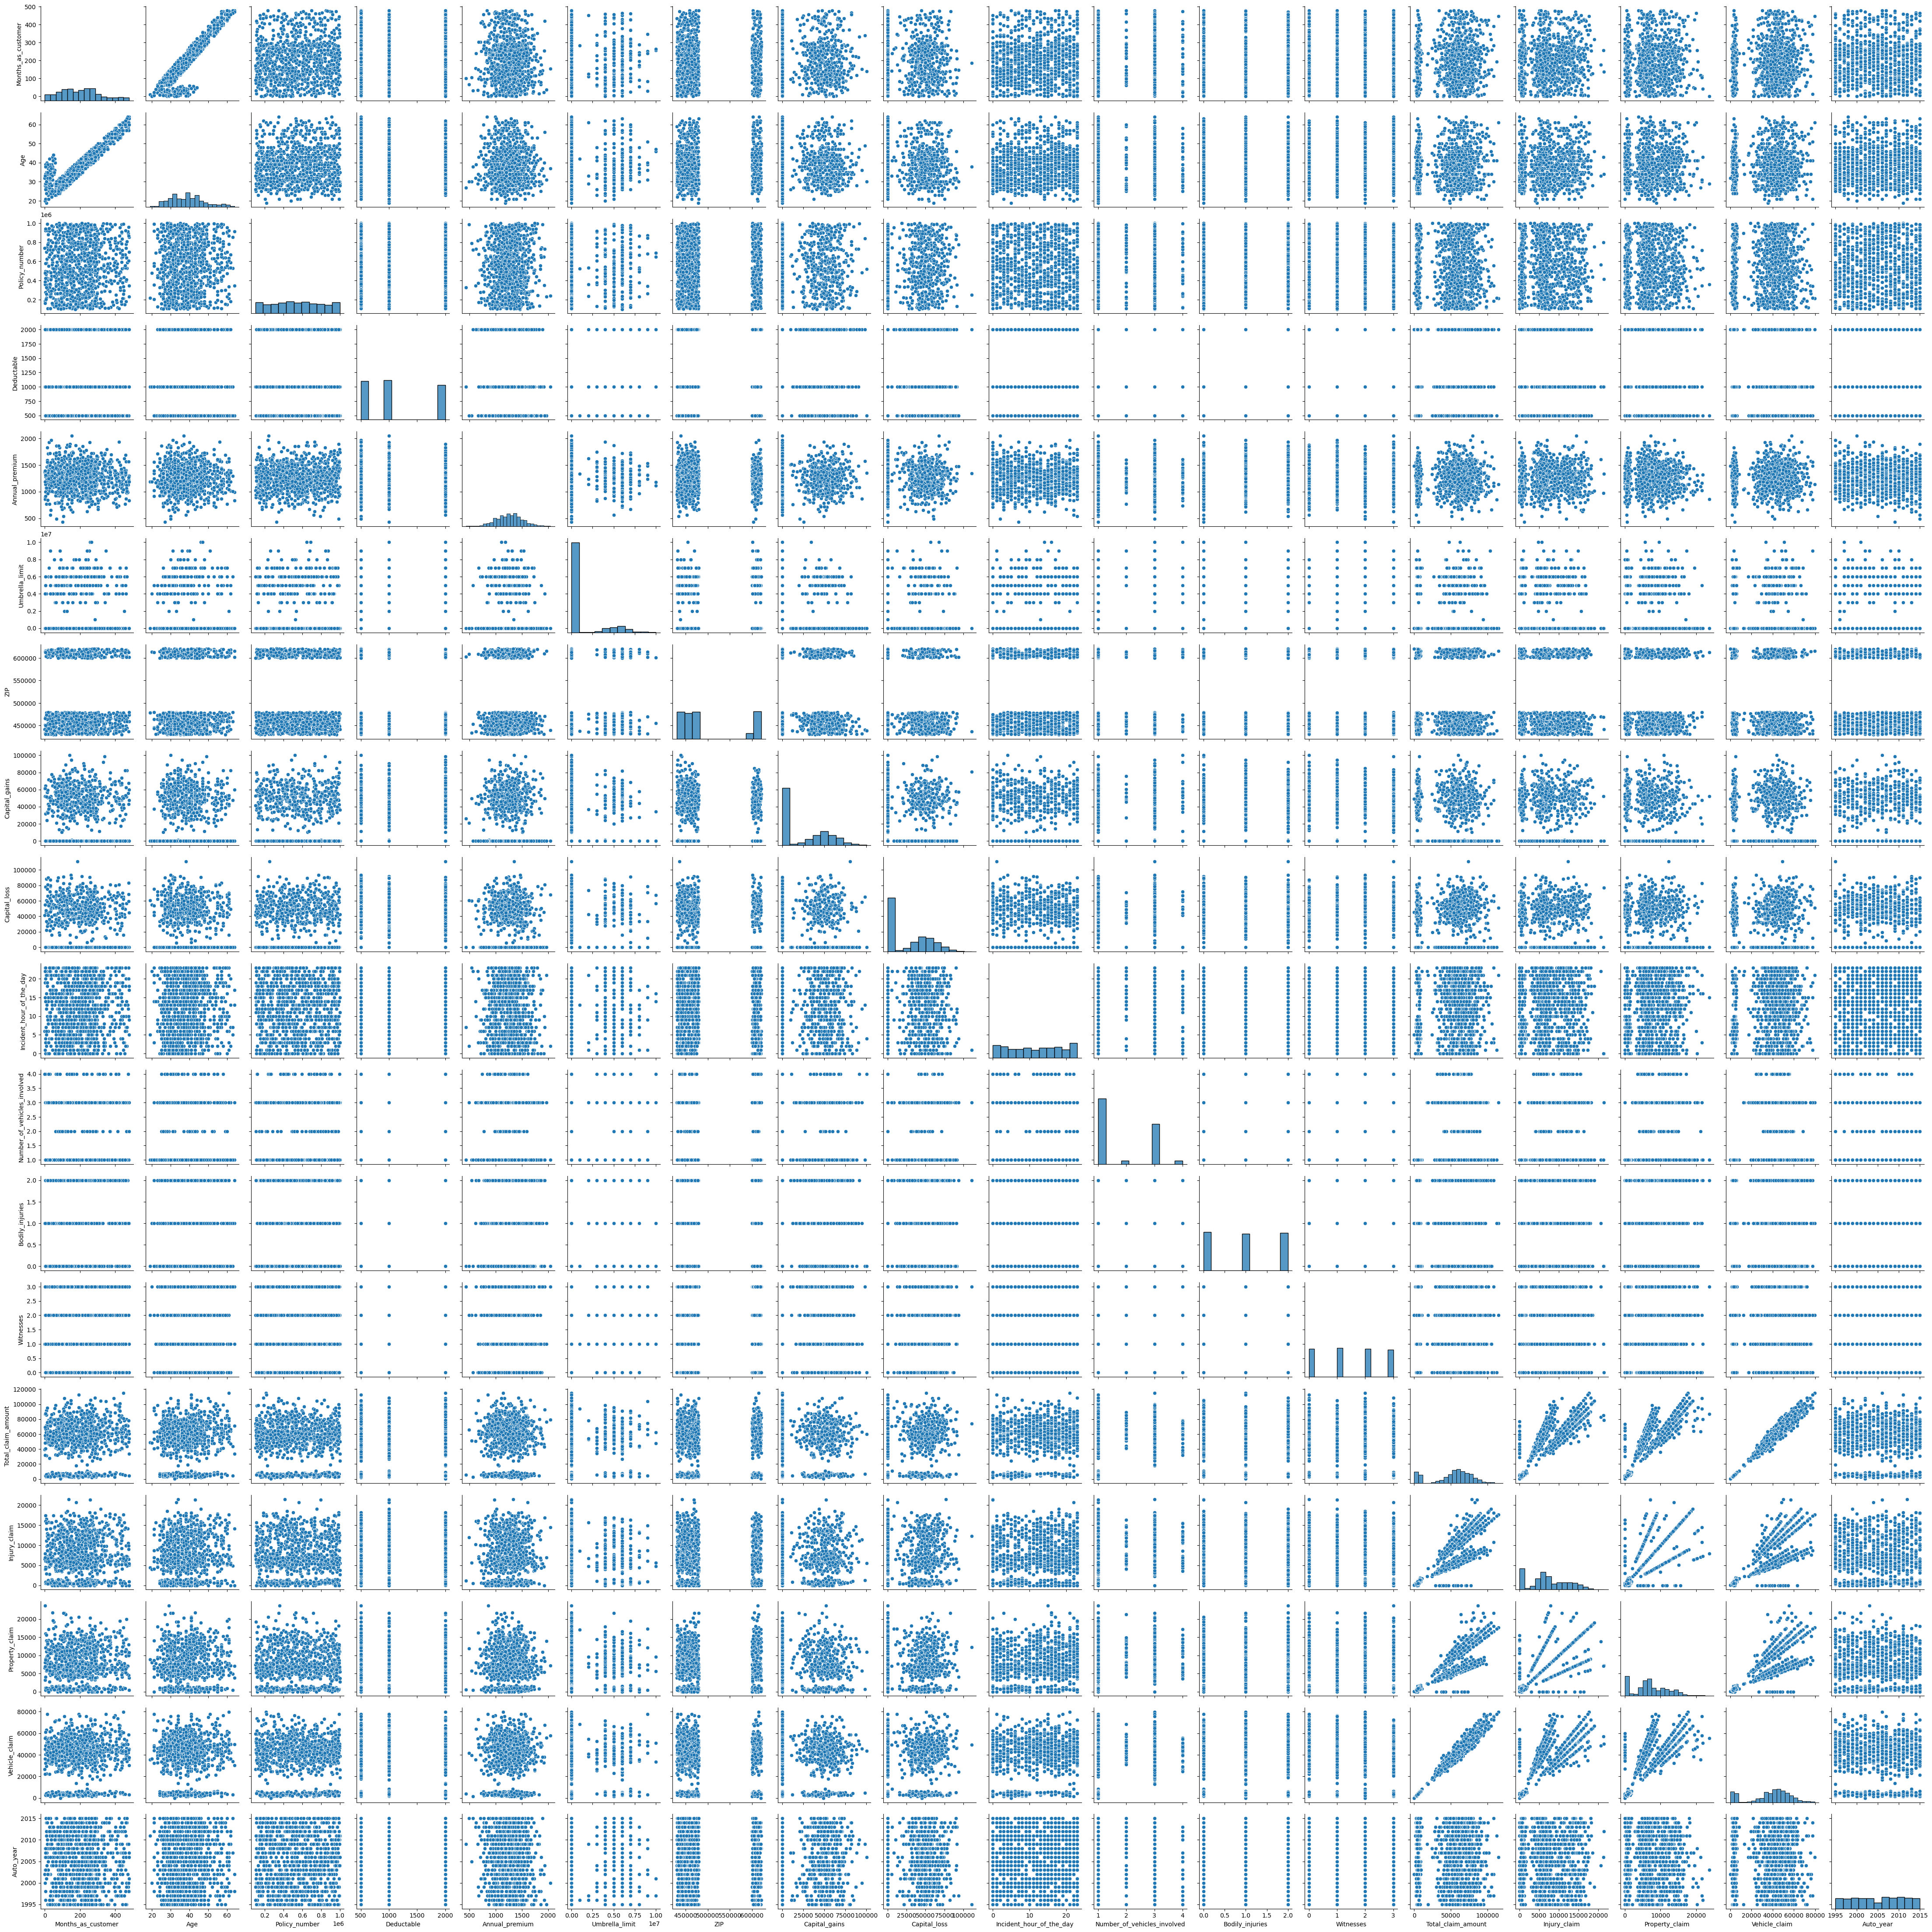

In [38]:
sns.pairplot(df)

- We can observe positve correlation between columns Months_as_customer and Age, Total_claim_amount and Vehicle_claim, Injury_claim and Vehicle_claim, Property_claim and Vehicle_claim, Total_claim_amount and Property_claim, Total_claim_amount and Injury_claim, Property_claim and Injury_claim.

#### Checking for Outliers

Checking Outliers using boxplot

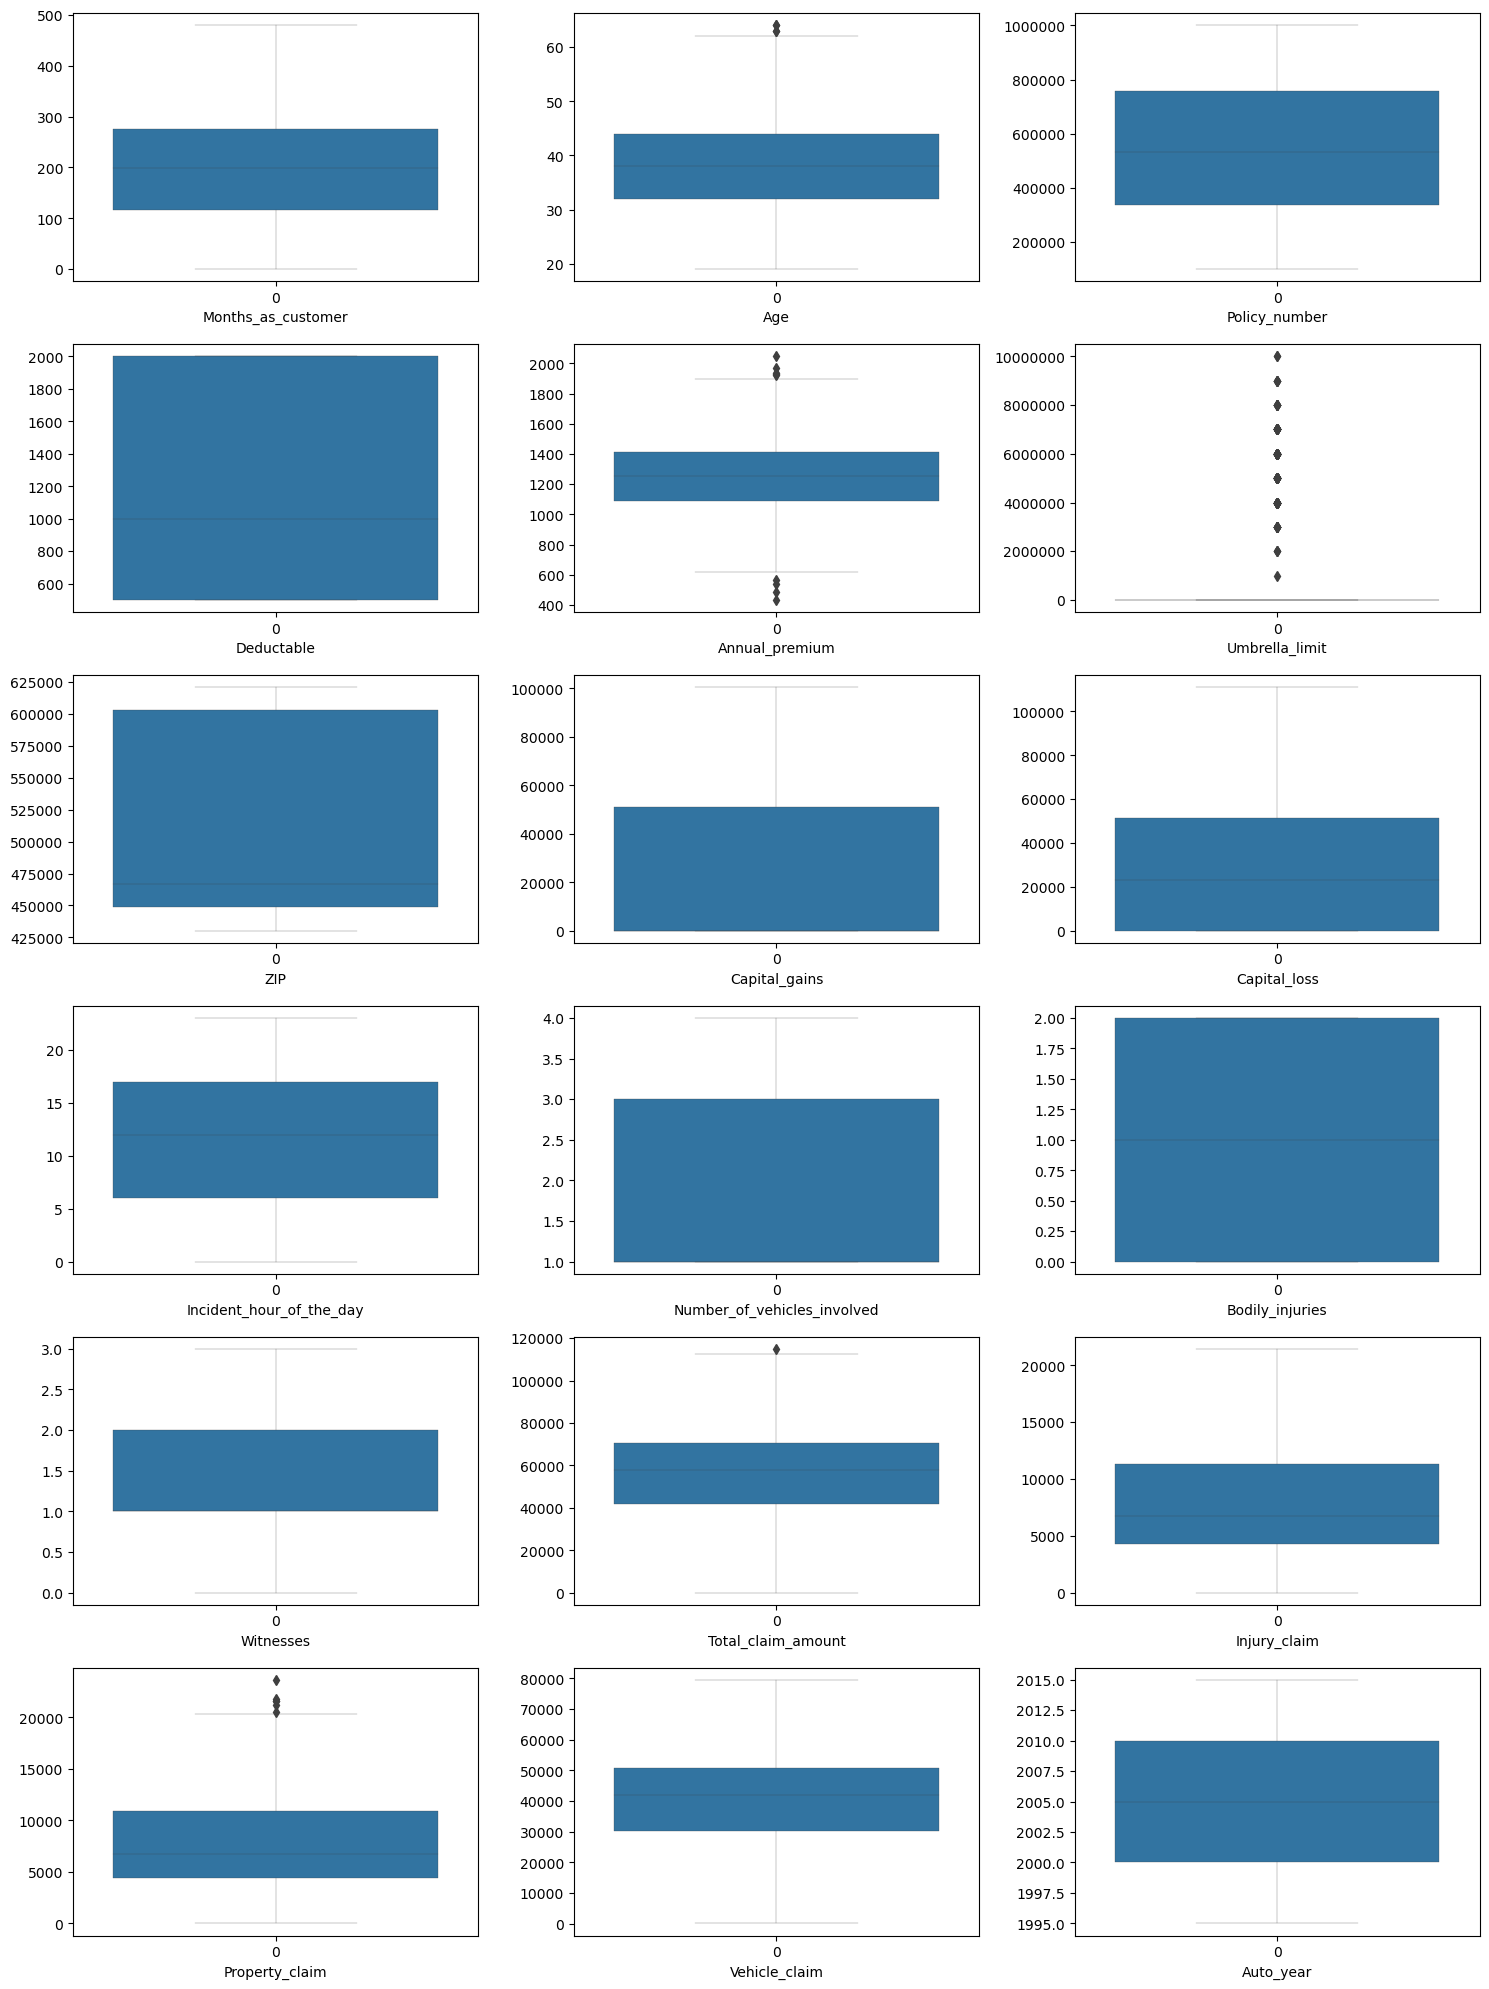

In [39]:
plt.figure(figsize=(15,20))
for index,column in enumerate(num_columns):
    if index<=len(num_columns):
        plt.subplot((len(num_columns)+1)//3,3,index+1)
        sns.boxplot(df[column],linewidth=.2)
        plt.xlabel(column)
        plt.ticklabel_format(style='plain',axis='y')
plt.tight_layout()
plt.show()

- We can observe outliers at columns Age, Annual_premium, Umbrella_limit, Total_claim_amount and Property_claim.

Checking outlier using zscore

Copying the dataset

In [40]:
data=df.copy()

In [41]:
def outlier_detect(data):
    z_score=np.abs(zscore(df[num_columns]))
    print(np.where(z_score>3))
    return z_score

In [42]:
z_score=outlier_detect(data)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 15,  5,  5,  5,  4,  8,
        5,  5,  5], dtype=int64))


Removing outliers using zscore

In [43]:
def outliers_removal(z_score,data):
    data=data[(z_score<3).all(axis=1)]
    return data

In [44]:
data=outliers_removal(z_score,data)

Checking data loss after outliers removal

In [45]:
total_data_loss=df.shape[0]-data.shape[0]
total_data_loss

20

- Total rows of data lost is 20

Total percentage of data loss

In [46]:
total_data_loss_percentage=(total_data_loss*100)/df.shape[0]
total_data_loss_percentage

2.0

Total perentage of data lost is 2% which is within the acceptable range.

Checking outliers using IQR

In [47]:
Q1=df[num_columns].quantile(0.25)
Q3=df[num_columns].quantile(0.75)

IQR=Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (df[num_columns]>=lower_bound) & (df[num_columns]<=upper_bound)

df_no_outliers=df[bounds.all(axis=1)]

Checking data loss after outliers removal

In [48]:
total_data_loss_by_IQR=df.shape[0]-df_no_outliers.shape[0]
total_data_loss_by_IQR

218

- Total rows of data lost is 218

Checking data loss percentage after outliers removal using IQR

In [49]:
total_data_loss_percentage_by_IQR=(total_data_loss_by_IQR*100)/df.shape[0]
total_data_loss_percentage_by_IQR

21.8

- Total perentage of data lost is 21.8% which is very high.
- Hence we will use zscore to remove outliers

Removing outliers using zscore

In [50]:
df=data.reset_index(drop=True)

Checking the shape of the dataframe after outliers removal

In [51]:
df.shape

(980, 37)

- Now the dataset has 980 rows and 37 columns.

#### Checking skewness of numerical columns

In [52]:
df[num_columns].skew()

Months_as_customer             0.36
Age                            0.48
Policy_number                  0.04
Deductable                     0.48
Annual_premium                 0.04
Umbrella_limit                 1.80
ZIP                            0.84
Capital_gains                  0.47
Capital_loss                   0.38
Incident_hour_of_the_day      -0.04
Number_of_vehicles_involved    0.51
Bodily_injuries                0.00
Witnesses                      0.03
Total_claim_amount            -0.59
Injury_claim                   0.27
Property_claim                 0.36
Vehicle_claim                 -0.62
Auto_year                     -0.05
dtype: float64

- Skewness can be observed in columns Umbrella_limit has skewness. 
- Although skewness is observed in ZIP but since it is postal code of a location. Hence no need to remove skewness.

Checking skewness in Umbrella_limit by applying sqrt

In [53]:
skewness_check_sqrt=np.sqrt(df['Umbrella_limit'])
skewness_check_sqrt.skew()

1.646686798562649

Checking skewness in Umbrella_limit by applying cbrt

In [54]:
skewness_check_cbrt=np.cbrt(df['Umbrella_limit'])
skewness_check_cbrt.skew()

1.6104678236371817

Checking skewness in Umbrella_limit by applying log

In [55]:
skewness_check_log=np.log(df['Umbrella_limit']+.001)
skewness_check_log.skew()

1.5768553057992063

Checking skewness in Umbrella_limit by applying boxcox

In [56]:
skewness_check_boxcox,_=boxcox(df['Umbrella_limit']+.001)
data=pd.DataFrame()
data['Umbrella_limit']=skewness_check_boxcox
data['Umbrella_limit'].skew()

1.57608996403976

Applying log in Umbrella_limit column

In [57]:
df['Umbrella_limit']=skewness_check_log

#### Feature Selection

The columns ZIP, Incident_date does not has any role in prediction of Fraud_reported. Hence, we can drop these columns.

In [58]:
df.drop('ZIP',axis=1,inplace=True)
df.drop('Incident_date',axis=1,inplace=True)

Label Encoding of categorical columns

In [59]:
cat_columns_label_encoder=[column for column in df.columns if df[column].dtypes=='O' and column not in ['Property_damage','Police_report_available','Fraud_reported']]
le=LabelEncoder()
df[cat_columns_label_encoder]=df[cat_columns_label_encoder].apply(lambda x:le.fit_transform(x))

Replacing Yes with 1, No with 0 and Unknown with 2 in Property_damage, Police_report_available and Fraud_reported columns

In [60]:
df['Property_damage'] = df['Property_damage'].map({'YES': 1, 'NO': 0, 'Unknown': 2})
df['Police_report_available'] = df['Police_report_available'].map({'YES': 1, 'NO': 0, 'Unknown': 2})
df['Fraud_reported'] = df['Fraud_reported'].map({'Y': 1, 'N': 0})

Checking the dataframe

In [61]:
df

Months_as_customer  Age  Policy_number  State  CSL  Deductable  \
0                   328   48         521585      2    1        1000   
1                   228   42         342868      1    1        2000   
2                   134   29         687698      2    0        2000   
3                   256   41         227811      0    1        2000   
4                   228   44         367455      0    2        1000   
..                  ...  ...            ...    ...  ...         ...   
975                   3   38         941851      2    2        1000   
976                 285   41         186934      0    0        1000   
977                 130   34         918516      2    1         500   
978                 458   62         533940      0    2        2000   
979                 456   60         556080      2    1        1000   

     Annual_premium  Umbrella_limit  Sex  Education_level  Occupation  \
0           1406.91           -6.91    1                4           2   
1           1197.22           15.42    1                4           6   
2           1413.14           15.42    0                6          11   
3           1415.74           15.61    0                6           1   
4           1583.91           15.61    1                0          11   
..              ...             ...  ...              ...         ...   
975         1310.80           -6.91    0                5           2   
976         1436.79           -6.91    0                6           9   
977         1383.49           14.91    0                5           1   
978         1356.92           15.42    1                0           5   
979          766.19           -6.91    0                0          11   

     Hobbies  Relationship  Capital_gains  Capital_loss  Incident_type  \
0         17             0          53300             0              2   
1         15             2              0             0              3   
2          2             3          35100             0              0   
3          2             4          48900         62400              2   
4          2             4          66000         46000              3   
..       ...           ...            ...           ...            ...   
975       13             4              0             0              2   
976       17             5          70900             0              2   
977        3             2          35100             0              0   
978        0             5              0             0              2   
979       11             0              0             0              1   

     Collision_type  Incident_severity  Authorities_contacted  Incident_state  \
0                 3                  0                      3               4   
1                 1                  1                      3               5   
2                 2                  1                      3               1   
3                 0                  0                      3               2   
4                 1                  1                      2               1   
..              ...                ...                    ...             ...   
975               0                  1                      1               0   
976               2                  0                      1               4   
977               3                  1                      3               0   
978               2                  0                      2               1   
979               1                  1                      3               6   

     Incident_city  Incident_hour_of_the_day  Number_of_vehicles_involved  \
0                1                         5                            1   
1                5                         8                            1   
2                1                         7                            3   
3                0                         5                            1   
4                0          

Analysing the dataset through correlation

<Axes: >

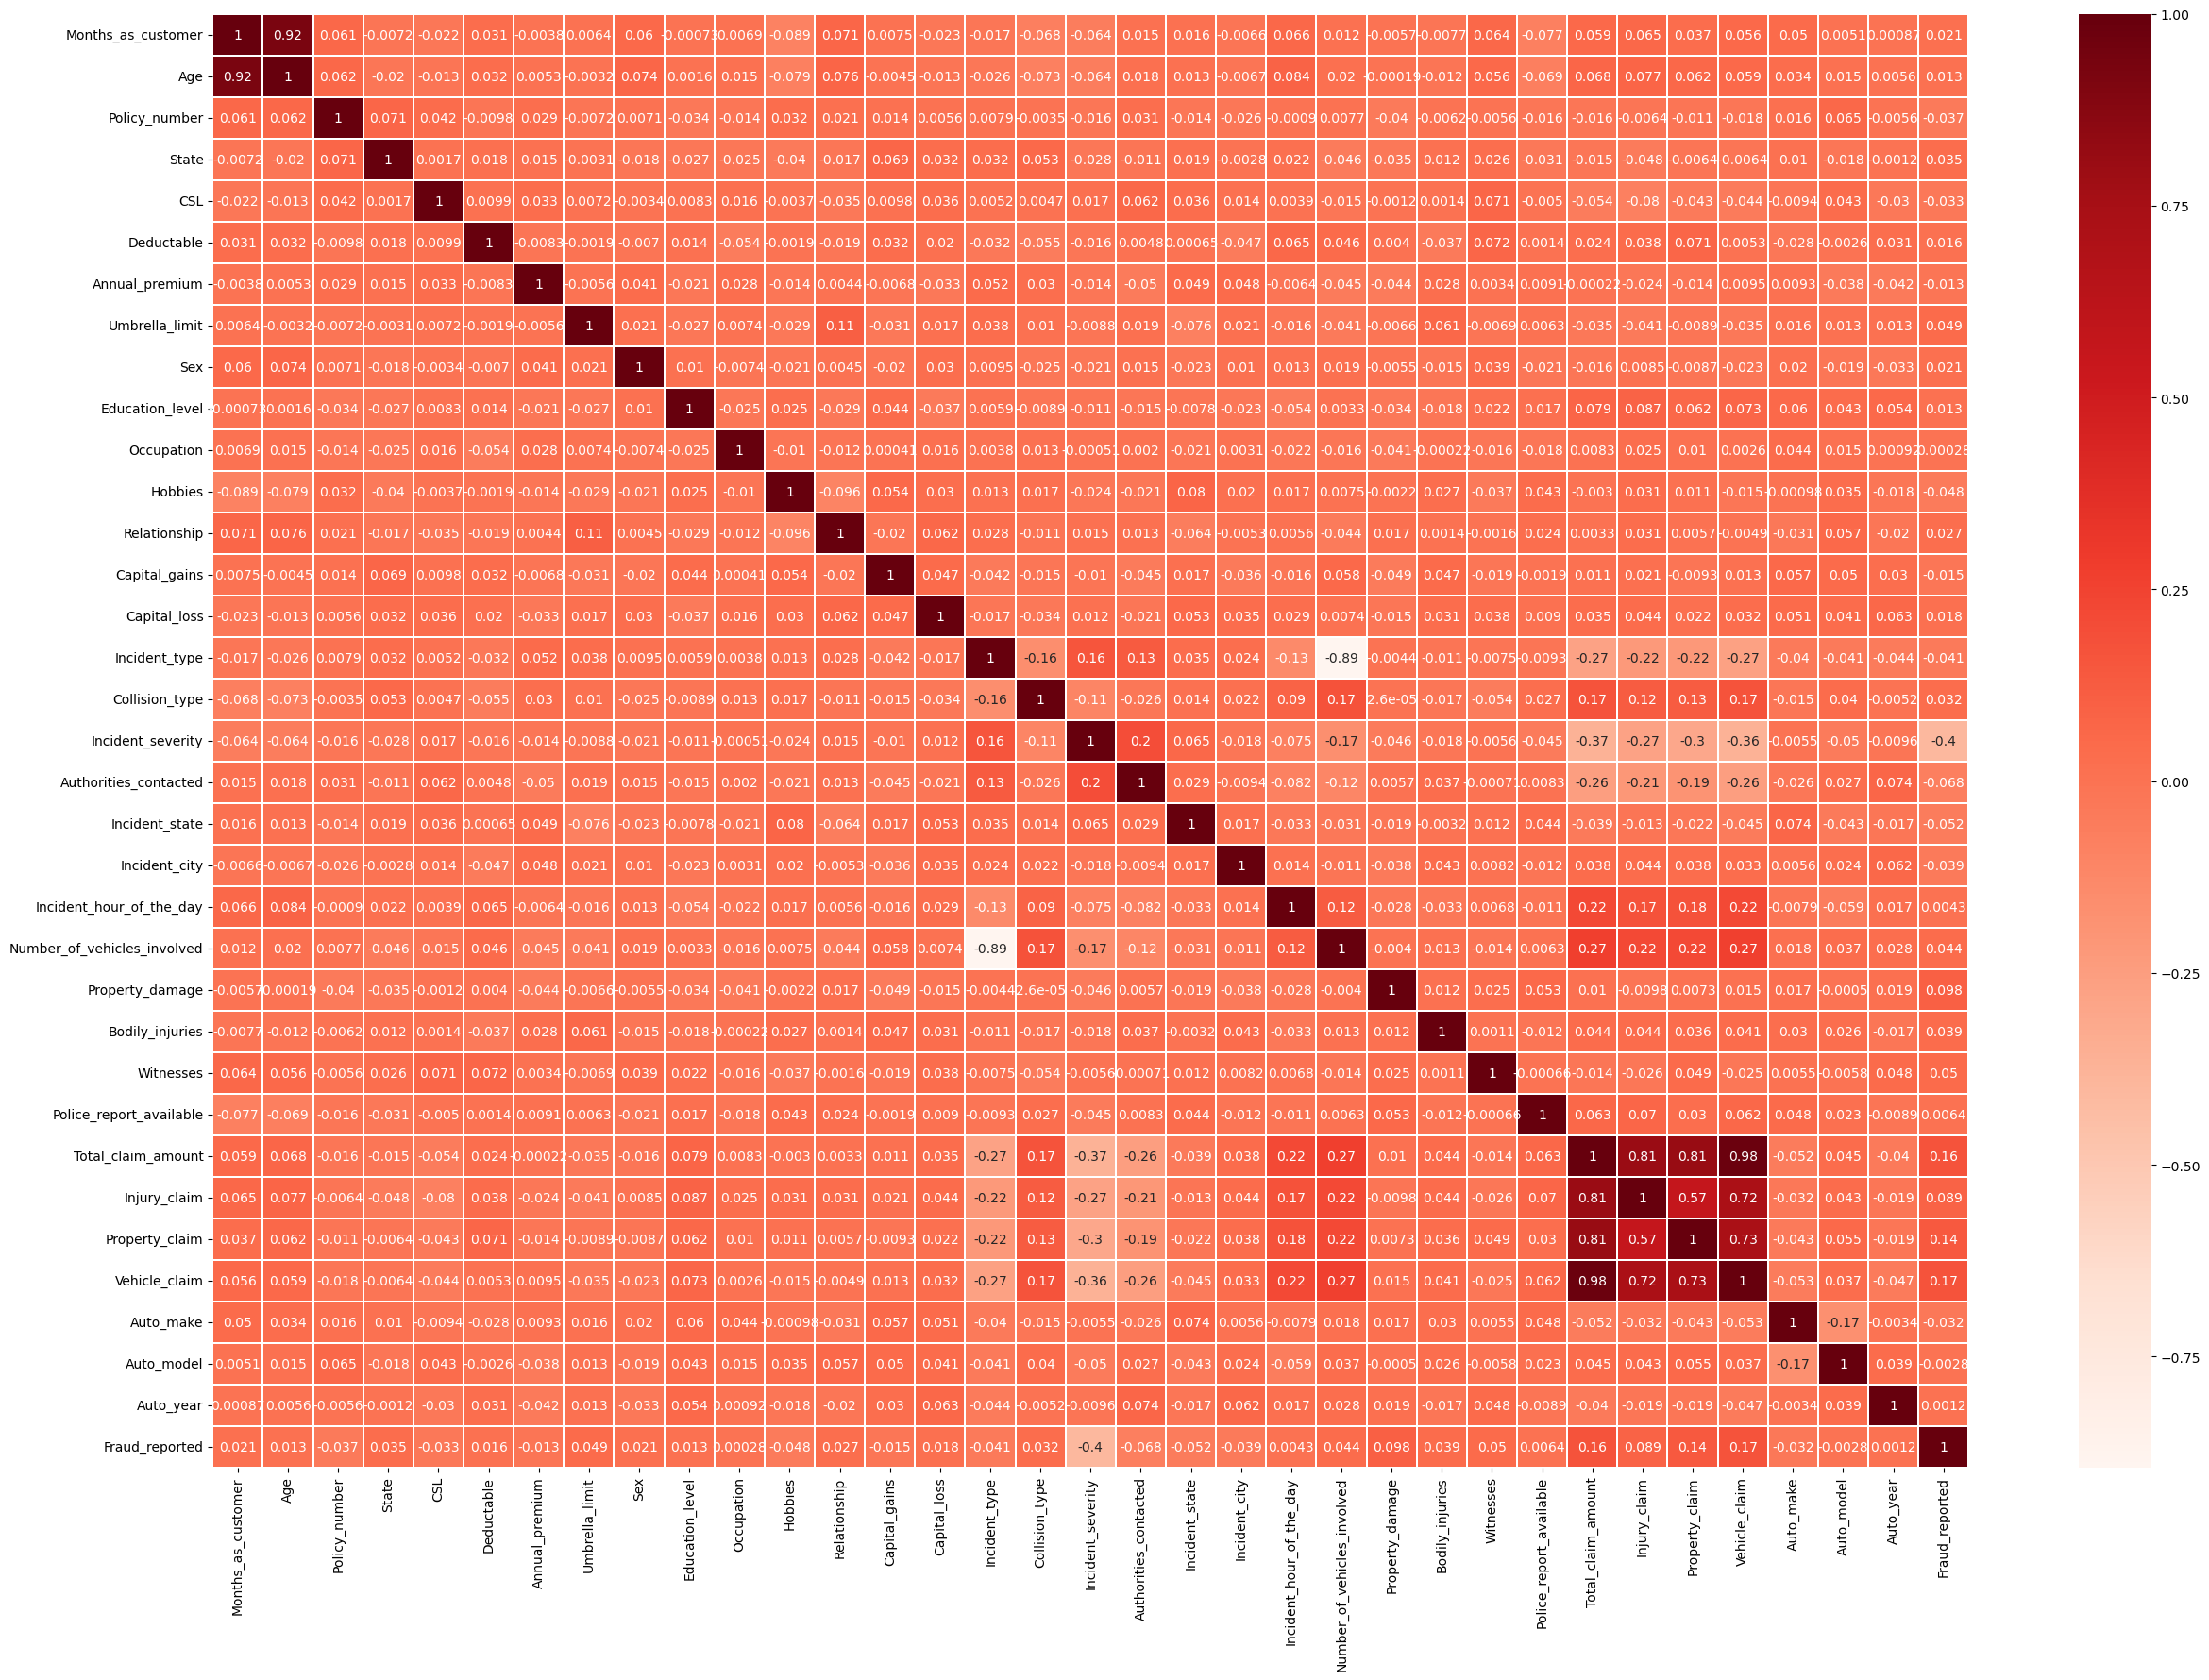

In [62]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,fmt='.2g',linewidth=.1,cmap='Reds')

- Not much correlation is observed with the target column Fraud_reported.
- Total_claim_amount has high correlation with Vehicle_claim.
- Total_claim_amount has high correlation with Injury_claim.
- Total_claim_amount has high correlation with Property_claim.
- Vehicle_claim has moderate correlation with Injury_claim.
- Vehicle_claim has moderate correlation with Property_claim.

#### Scaling the dataset

Separating the target and independent columns

In [63]:
x=df.drop('Fraud_reported',axis=1)
y=df['Fraud_reported']

In [64]:
def StandardScaling(x):
    st=StandardScaler()
    x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
    return x

In [65]:
StandardScaling(x)

Months_as_customer   Age  Policy_number  State   CSL  Deductable  \
0                  1.07  0.98          -0.10   1.18  0.07       -0.22   
1                  0.20  0.33          -0.79  -0.02  0.07        1.41   
2                 -0.61 -1.09           0.55   1.18 -1.18        1.41   
3                  0.45  0.22          -1.24  -1.23  0.07        1.41   
4                  0.20  0.55          -0.69  -1.23  1.31       -0.22   
..                  ...   ...            ...    ...   ...         ...   
975               -1.75 -0.11           1.54   1.18  1.31       -0.22   
976                0.70  0.22          -1.40  -1.23 -1.18       -0.22   
977               -0.65 -0.54           1.45   1.18  0.07       -1.04   
978                2.20  2.51          -0.05  -1.23  1.31        1.41   
979                2.18  2.29           0.04   1.18  0.07       -0.22   

     Annual_premium  Umbrella_limit   Sex  Education_level  Occupation  \
0              0.62           -0.49  1.07             0.53       -1.16   
1             -0.25            2.06  1.07             0.53       -0.16   
2              0.65            2.06 -0.93             1.56        1.08   
3              0.66            2.08 -0.93             1.56       -1.41   
4              1.35            2.08  1.07            -1.52        1.08   
..              ...             ...   ...              ...         ...   
975            0.22           -0.49 -0.93             1.04       -1.16   
976            0.74           -0.49 -0.93             1.56        0.59   
977            0.52            2.00 -0.93             1.04       -1.41   
978            0.41            2.06  1.07            -1.52       -0.41   
979           -2.03           -0.49 -0.93            -1.52        1.08   

     Hobbies  Relationship  Capital_gains  Capital_loss  Incident_type  \
0       1.28         -1.44           1.00         -0.96           0.76   
1       0.92         -0.25          -0.91         -0.96           1.69   
2      -1.36          0.35           0.35         -0.96          -1.09   
3      -1.36          0.94           0.85          1.28           0.76   
4      -1.36          0.94           1.46          0.69           1.69   
..       ...           ...            ...           ...            ...   
975     0.57          0.94          -0.91         -0.96           0.76   
976     1.28          1.54           1.63         -0.96           0.76   
977    -1.19         -0.25           0.35         -0.96          -1.09   
978    -1.71          1.54          -0.91         -0.96           0.76   
979     0.22         -1.44          -0.91         -0.96          -0.16   

     Collision_type  Incident_severity  Authorities_contacted  Incident_state  \
0              1.24              -1.26                   1.21            0.35   
1             -0.52              -0.20                   1.21            0.81   
2              0.36              -0.20                   1.21           -1.04   
3             -1.39              -1.26                   1.21           -0.58   
4             -0.52              -0.20                   0.30           -1.04   
..              ...                ...                    ...             ...   
975           -1.39              -0.20                  -0.62           -1.50   
976            0.36              -1.26                  -0.62            0.35   
977            1.24              -0.20                   1.21           -1.50   
978            0.36              -1.26                   0.30           -1.04   
979           -0.52              -0.20                   1.21            1.28   

     Incident_city  Incident_hour_of_the_day  Number_of_vehicles_involved  \
0            -0.97                     -0.96                        -0.82   
1             0.99                     -0.53                        -0.82   
2            -0.97                     -0.67                         1.14   
3            -1.46                     -0.96                        -

#### Checking the Variance Inflation Factor

In [66]:
def vif_cal(x):
    vif=pd.DataFrame()
    vif['Columns']=x.columns
    vif['VIF Factor']=[VIF(x.values,i) for i in range(x.shape[1])]
    return vif

In [67]:
vif_cal(x)

Columns  VIF Factor
0            Months_as_customer       28.62
1                           Age      131.58
2                 Policy_number        5.66
3                         State        2.59
4                           CSL        2.45
5                    Deductable        4.64
6                Annual_premium       28.87
7                Umbrella_limit        1.12
8                           Sex        1.91
9               Education_level        3.41
10                   Occupation        3.80
11                      Hobbies        4.11
12                 Relationship        3.21
13                Capital_gains        1.89
14                 Capital_loss        1.98
15                Incident_type       11.22
16               Collision_type        3.19
17            Incident_severity        3.10
18        Authorities_contacted        3.72
19               Incident_state        3.40
20                Incident_city        3.21
21     Incident_hour_of_the_day        4.17
22  Number_of_vehicles_involved       21.81
23              Property_damage        2.56
24              Bodily_injuries        2.55
25                    Witnesses        2.88
26      Police_report_available        2.52
27           Total_claim_amount         inf
28                 Injury_claim         inf
29               Property_claim         inf
30                Vehicle_claim         inf
31                    Auto_make        3.94
32                   Auto_model        4.28
33                    Auto_year      166.59

- Column Total_claim_amount, Injury_claim, Property_claim, Vehicle_claim has extremely high variance which indicate very high multicollinearity.
- Columns Auto_year, Age, Months_as_customer, Annual_premium, Number_of_vehicles_involved has high variance.
- We will drop Total_claim_amount from the dataset.

In [68]:
x.drop('Total_claim_amount',axis=1,inplace=True)

Checking VIF

In [69]:
vif_cal(x)

Columns  VIF Factor
0            Months_as_customer       28.62
1                           Age      131.58
2                 Policy_number        5.66
3                         State        2.59
4                           CSL        2.45
5                    Deductable        4.64
6                Annual_premium       28.87
7                Umbrella_limit        1.12
8                           Sex        1.91
9               Education_level        3.41
10                   Occupation        3.80
11                      Hobbies        4.11
12                 Relationship        3.21
13                Capital_gains        1.89
14                 Capital_loss        1.98
15                Incident_type       11.22
16               Collision_type        3.19
17            Incident_severity        3.10
18        Authorities_contacted        3.72
19               Incident_state        3.40
20                Incident_city        3.21
21     Incident_hour_of_the_day        4.17
22  Number_of_vehicles_involved       21.81
23              Property_damage        2.56
24              Bodily_injuries        2.55
25                    Witnesses        2.88
26      Police_report_available        2.52
27                 Injury_claim        7.23
28               Property_claim        7.61
29                Vehicle_claim       17.13
30                    Auto_make        3.94
31                   Auto_model        4.28
32                    Auto_year      166.59

- Columns Auto_year, Age, Months_as_customer, Annual_premium, Number_of_vehicles_involved has high variance.
- We will drop Auto_year from the dataset.

In [70]:
x.drop('Auto_year',axis=1,inplace=True)

Checking VIF

In [71]:
vif_cal(x)

Columns  VIF Factor
0            Months_as_customer       23.56
1                           Age       97.67
2                 Policy_number        5.59
3                         State        2.56
4                           CSL        2.44
5                    Deductable        4.55
6                Annual_premium       24.83
7                Umbrella_limit        1.12
8                           Sex        1.91
9               Education_level        3.38
10                   Occupation        3.73
11                      Hobbies        4.05
12                 Relationship        3.17
13                Capital_gains        1.88
14                 Capital_loss        1.98
15                Incident_type        8.65
16               Collision_type        3.16
17            Incident_severity        2.98
18        Authorities_contacted        3.67
19               Incident_state        3.38
20                Incident_city        3.18
21     Incident_hour_of_the_day        4.13
22  Number_of_vehicles_involved       16.85
23              Property_damage        2.51
24              Bodily_injuries        2.54
25                    Witnesses        2.84
26      Police_report_available        2.50
27                 Injury_claim        7.23
28               Property_claim        7.59
29                Vehicle_claim       16.72
30                    Auto_make        3.83
31                   Auto_model        4.20

- Columns Age, Months_as_customer, Annual_premium, Number_of_vehicles_involved, Vehicle_claim has high variance.
- We will drop Age column.

In [72]:
x.drop('Age',axis=1,inplace=True)

Checking VIF

In [73]:
vif_cal(x)

Columns  VIF Factor
0            Months_as_customer        4.30
1                 Policy_number        5.55
2                         State        2.55
3                           CSL        2.43
4                    Deductable        4.52
5                Annual_premium       22.92
6                Umbrella_limit        1.12
7                           Sex        1.90
8               Education_level        3.36
9                    Occupation        3.68
10                      Hobbies        4.02
11                 Relationship        3.14
12                Capital_gains        1.88
13                 Capital_loss        1.97
14                Incident_type        7.85
15               Collision_type        3.16
16            Incident_severity        2.94
17        Authorities_contacted        3.63
18               Incident_state        3.38
19                Incident_city        3.18
20     Incident_hour_of_the_day        4.07
21  Number_of_vehicles_involved       15.17
22              Property_damage        2.49
23              Bodily_injuries        2.54
24                    Witnesses        2.83
25      Police_report_available        2.50
26                 Injury_claim        7.22
27               Property_claim        7.55
28                Vehicle_claim       16.71
29                    Auto_make        3.81
30                   Auto_model        4.15

- Columns Annual_premium, Number_of_vehicles_involved and Vehicle_claim has high variance.
- We will drop column Annual_premium column.

In [74]:
x.drop('Annual_premium',axis=1,inplace=True)

Checking the VIF

In [75]:
vif_cal(x)

Columns  VIF Factor
0            Months_as_customer        4.28
1                 Policy_number        5.49
2                         State        2.54
3                           CSL        2.42
4                    Deductable        4.49
5                Umbrella_limit        1.12
6                           Sex        1.90
7               Education_level        3.35
8                    Occupation        3.63
9                       Hobbies        4.00
10                 Relationship        3.11
11                Capital_gains        1.88
12                 Capital_loss        1.97
13                Incident_type        6.79
14               Collision_type        3.14
15            Incident_severity        2.91
16        Authorities_contacted        3.63
17               Incident_state        3.35
18                Incident_city        3.15
19     Incident_hour_of_the_day        4.06
20  Number_of_vehicles_involved       13.47
21              Property_damage        2.48
22              Bodily_injuries        2.52
23                    Witnesses        2.82
24      Police_report_available        2.49
25                 Injury_claim        7.20
26               Property_claim        7.54
27                Vehicle_claim       16.44
28                    Auto_make        3.78
29                   Auto_model        4.14

- Columns Vehicle_claim and Number_of_vehicles_involved has high varicance.
- Hence we will drop the columns Vehicle_claim.

In [76]:
x.drop('Vehicle_claim',axis=1,inplace=True)

Checking VIF

In [77]:
vif_cal(x)

Columns  VIF Factor
0            Months_as_customer        4.27
1                 Policy_number        5.48
2                         State        2.53
3                           CSL        2.41
4                    Deductable        4.48
5                Umbrella_limit        1.12
6                           Sex        1.89
7               Education_level        3.34
8                    Occupation        3.63
9                       Hobbies        4.00
10                 Relationship        3.11
11                Capital_gains        1.88
12                 Capital_loss        1.97
13                Incident_type        6.69
14               Collision_type        3.12
15            Incident_severity        2.88
16        Authorities_contacted        3.61
17               Incident_state        3.34
18                Incident_city        3.14
19     Incident_hour_of_the_day        4.00
20  Number_of_vehicles_involved       13.05
21              Property_damage        2.48
22              Bodily_injuries        2.52
23                    Witnesses        2.81
24      Police_report_available        2.48
25                 Injury_claim        5.27
26               Property_claim        5.31
27                    Auto_make        3.78
28                   Auto_model        4.14

- The column Number_of_vehicles_involved exhibits a variance slightly higher than the acceptable range. However, due to its importance, we will retain it in the model. 
- The variance inflation factor is within the acceptable range. Not much multicollinearity is present in the dataset.

Imbalance dataset check

Checking value counts of Income

In [78]:
y.value_counts()

Fraud_reported
0    740
1    240
Name: count, dtype: int64

- We can observe that the dataset is imbalanced. Hence we need to apply SMOTE to make the dataset balanced.

Applying SMOTE to make the dataset balance

In [79]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Verifying the value counts

In [80]:
y.value_counts()

Fraud_reported
1    740
0    740
Name: count, dtype: int64

- Now the dataset is balanced and ready for modelling

### Modelling

Evaluating the best random_state using Logistic regression

In [81]:
def best_random_state(x,y):
    best_randomstate=0
    best_score=0
    
    lr=LogisticRegression()
    for rs in range (1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rs)
        lr.fit(x_train,y_train)
        prediction=lr.predict(x_test)
        score=accuracy_score(y_test,prediction)
        
        if score>best_score:
            best_score=score
            best_randomstate=rs
    print('Accuracy score: {} and Random state: {}'.format(best_score, best_randomstate))

In [82]:
best_random_state(x,y)

Accuracy score: 0.6189189189189189 and Random state: 49


Spliting dataset into train and test

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=49)

Logistic regression model

In [84]:
def logistic_regression(x_train,x_test,y_train,y_test):
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_pred=lr.predict(x_test)
    
    acc_lr=accuracy_score(y_test,lr_pred)
    print('The accuracy using Logistic regression is: {:4f}% '.format((acc_lr)*100))
    print(confusion_matrix(y_test,lr_pred))
    print(classification_report(y_test,lr_pred))
    
    return lr_pred, acc_lr

In [85]:
lr_pred, acc_lr=logistic_regression(x_train,x_test,y_train,y_test)

The accuracy using Logistic regression is: 60.360360% 
[[119 113]
 [ 63 149]]
              precision    recall  f1-score   support

           0       0.65      0.51      0.57       232
           1       0.57      0.70      0.63       212

    accuracy                           0.60       444
   macro avg       0.61      0.61      0.60       444
weighted avg       0.61      0.60      0.60       444



Support Vector Classification

In [86]:
def support_vector(x_train,x_test,y_train,y_test):
    svc=SVC()
    svc.fit(x_train,y_train)
    svc_pred=svc.predict(x_test)
    acc_svc=accuracy_score(y_test,svc_pred)
    
    print('The accuracy using SVC is: {:4f}% '.format((acc_svc)*100))
    print(confusion_matrix(y_test,svc_pred))
    print(classification_report(y_test,svc_pred))
    
    return svc_pred, acc_svc

In [87]:
svc_pred, acc_svc=support_vector(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 57.432432% 
[[107 125]
 [ 64 148]]
              precision    recall  f1-score   support

           0       0.63      0.46      0.53       232
           1       0.54      0.70      0.61       212

    accuracy                           0.57       444
   macro avg       0.58      0.58      0.57       444
weighted avg       0.59      0.57      0.57       444



Random Forest Classifier

In [88]:
def random_forest(x_train,x_test,y_train,y_test):
    
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    rfc_pred=rfc.predict(x_test)
    
    acc_rfc=accuracy_score(y_test,rfc_pred)
    print('The accuracy using Random Forest is: {:4f}% '.format((accuracy_score(y_test,rfc_pred))*100))
    print(confusion_matrix(y_test,rfc_pred))
    print(classification_report(y_test,rfc_pred))
    
    return rfc_pred,acc_rfc

In [89]:
rfc_pred,acc_rfc = random_forest(x_train,x_test,y_train,y_test)

The accuracy using Random Forest is: 90.315315% 
[[211  21]
 [ 22 190]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       232
           1       0.90      0.90      0.90       212

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90       444
weighted avg       0.90      0.90      0.90       444



Adaboost Classifier

In [90]:
def adaboost(x_train,x_test,y_train,y_test):
    
    abc=AdaBoostClassifier()
    abc.fit(x_train,y_train)
    abc_pred=abc.predict(x_test)
    
    acc_abc=accuracy_score(y_test,abc_pred)
    print('The accuracy using Adaboost is: {:4f}% '.format((accuracy_score(y_test,abc_pred))*100))
    print(confusion_matrix(y_test,abc_pred))
    print(classification_report(y_test,abc_pred))
    
    return abc_pred, acc_abc

In [91]:
abc_pred, acc_abc = adaboost(x_train,x_test,y_train,y_test)

The accuracy using Adaboost is: 89.189189% 
[[211  21]
 [ 27 185]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       232
           1       0.90      0.87      0.89       212

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444



Gradient Boost Classifier

In [92]:
def gradientboost(x_train,x_test,y_train,y_test):
    
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train,y_train)
    gbc_pred=gbc.predict(x_test)
    
    acc_gbc=accuracy_score(y_test,gbc_pred)
    print('The accuracy using Gradientboost is: {:4f}% '.format((accuracy_score(y_test,gbc_pred))*100))
    print(confusion_matrix(y_test,gbc_pred))
    print(classification_report(y_test,gbc_pred))
    
    return gbc_pred,acc_gbc

In [93]:
gbc_pred, acc_gbc = gradientboost(x_train,x_test,y_train,y_test)

The accuracy using Gradientboost is: 90.540541% 
[[207  25]
 [ 17 195]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       232
           1       0.89      0.92      0.90       212

    accuracy                           0.91       444
   macro avg       0.91      0.91      0.91       444
weighted avg       0.91      0.91      0.91       444



Bagging classifier

In [94]:
def baggingclassifier(x_train,x_test,y_train,y_test):
    
    bc=BaggingClassifier()
    bc.fit(x_train,y_train)
    bc_pred=bc.predict(x_test)
    
    acc_bc=accuracy_score(y_test,bc_pred)
    print('The accuracy using Bagging classfier is: {:4f}% '.format((accuracy_score(y_test,bc_pred))*100))
    print(confusion_matrix(y_test,bc_pred))
    print(classification_report(y_test,bc_pred))
    
    return bc_pred,acc_bc

In [95]:
bc_pred, acc_bc = baggingclassifier(x_train,x_test,y_train,y_test)

The accuracy using Bagging classfier is: 90.090090% 
[[211  21]
 [ 23 189]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       232
           1       0.90      0.89      0.90       212

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90       444
weighted avg       0.90      0.90      0.90       444



ExtraTree classifier

In [96]:
def extratree_classifier(x_train,x_test,y_train,y_test):
    
    etc=ExtraTreesClassifier()
    etc.fit(x_train,y_train)
    etc_pred=etc.predict(x_test)
    
    acc_etc=accuracy_score(y_test,etc_pred)
    print('The accuracy using Extratrees is: {:4f}% '.format((accuracy_score(y_test,etc_pred))*100))
    print(confusion_matrix(y_test,etc_pred))
    print(classification_report(y_test,etc_pred))
    
    return etc_pred, acc_etc

In [97]:
etc_pred, acc_etc=extratree_classifier(x_train,x_test,y_train,y_test)

The accuracy using Extratrees is: 90.315315% 
[[208  24]
 [ 19 193]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       232
           1       0.89      0.91      0.90       212

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90       444
weighted avg       0.90      0.90      0.90       444



DecisionTree classifier

In [98]:
def decisiontree_classifier(x_train,x_test,y_train,y_test):
    
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    dtc_pred=dtc.predict(x_test)
    
    acc_dtc=accuracy_score(y_test,dtc_pred)
    print('The accuracy using Decisiontree is: {:4f}% '.format((accuracy_score(y_test,dtc_pred))*100))
    print(confusion_matrix(y_test,dtc_pred))
    print(classification_report(y_test,dtc_pred))
    
    return dtc_pred, acc_dtc

In [99]:
dtc_pred, acc_dtc = decisiontree_classifier(x_train,x_test,y_train,y_test)

The accuracy using Decisiontree is: 81.081081% 
[[183  49]
 [ 35 177]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       232
           1       0.78      0.83      0.81       212

    accuracy                           0.81       444
   macro avg       0.81      0.81      0.81       444
weighted avg       0.81      0.81      0.81       444



KNN classifier

In [100]:
def knn(x_train,x_test,y_train,y_test):
    
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    knn_pred=knn.predict(x_test)
    
    acc_knn=accuracy_score(y_test,knn_pred)
    print('The accuracy using KNN is: {:4f}% '.format((accuracy_score(y_test,knn_pred))*100))
    print(confusion_matrix(y_test,knn_pred))
    print(classification_report(y_test,knn_pred))
    
    return knn_pred, acc_knn

In [101]:
knn_pred, acc_knn = knn(x_train,x_test,y_train,y_test)

The accuracy using KNN is: 68.918919% 
[[129 103]
 [ 35 177]]
              precision    recall  f1-score   support

           0       0.79      0.56      0.65       232
           1       0.63      0.83      0.72       212

    accuracy                           0.69       444
   macro avg       0.71      0.70      0.69       444
weighted avg       0.71      0.69      0.68       444



Ridge Classifier

In [102]:
def ridge(x_train,x_test,y_train,y_test):
    
    rd=RidgeClassifier()
    rd.fit(x_train,y_train)
    rd_pred=rd.predict(x_test)
    
    acc_rd=accuracy_score(y_test,rd_pred)
    print('The accuracy using Ridge is: {:4f}% '.format((accuracy_score(y_test,rd_pred))*100))
    print(confusion_matrix(y_test,rd_pred))
    print(classification_report(y_test,rd_pred))
    
    return rd_pred, acc_rd

In [103]:
rd_pred, acc_rd = ridge(x_train,x_test,y_train,y_test)

The accuracy using Ridge is: 81.981982% 
[[179  53]
 [ 27 185]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       232
           1       0.78      0.87      0.82       212

    accuracy                           0.82       444
   macro avg       0.82      0.82      0.82       444
weighted avg       0.83      0.82      0.82       444



#### Cross Validating the models¶

In [104]:
def cross_validation(x,y,*args):
    
    # Cross validation for Logistic Regression
    lr=LogisticRegression()
    lr_score=cross_val_score(lr,x,y)
    diff_lr=accuracy_score(y_test,lr_pred)-lr_score.mean()
    
    # Cross SVC
    svc=SVC()
    svc_score=cross_val_score(svc,x,y)
    diff_svc=accuracy_score(y_test,svc_pred)-svc_score.mean()
    
    # Cross validation for RandomForestClassifier
    rfc=RandomForestClassifier()
    rfc_score=cross_val_score(rfc,x,y)
    diff_rfc=accuracy_score(y_test,rfc_pred)-rfc_score.mean()
    
    # Cross validation for AdaBoostClassifier
    abc=AdaBoostClassifier()
    abc_score=cross_val_score(abc,x,y)
    diff_abc=accuracy_score(y_test,abc_pred)-abc_score.mean()
    
    # Cross validation for GradientBoostingClassifier
    gbc=GradientBoostingClassifier()
    gbc_score=cross_val_score(gbc,x,y)
    diff_gbc=accuracy_score(y_test,gbc_pred)-gbc_score.mean()
    
    # Cross validation for BaggingClassifier
    bc=BaggingClassifier()
    bc_score=cross_val_score(bc,x,y)
    diff_bc=accuracy_score(y_test,bc_pred)-bc_score.mean()
    
    # Cross validation for ExtraTreesClassifier
    etc=ExtraTreesClassifier()
    etc_score=cross_val_score(etc,x,y)
    diff_etc=accuracy_score(y_test,etc_pred)-etc_score.mean()
    
    # Cross validation for DecisionTreeClassifier
    dtc=DecisionTreeClassifier()
    dtc_score=cross_val_score(dtc,x,y)
    diff_dtc=accuracy_score(y_test,dtc_pred)-dtc_score.mean()
    
    # Cross validation for KNeighborsClassifier
    knn=KNeighborsClassifier()
    knn_score=cross_val_score(knn,x,y)
    diff_knn=accuracy_score(y_test,knn_pred)-knn_score.mean()
    
    # Cross validation for RidgeClassifier
    rd=RidgeClassifier()
    rd_score=cross_val_score(rd,x,y)
    diff_rd=accuracy_score(y_test,rd_pred)-rd_score.mean()
    
    df=pd.DataFrame({'Classification Name':['Logistic Regression',
                                        'SVC',
                                        'RandomForestClassifier',
                                        'AdaBoostClassifier',
                                        'GradientBoostingClassifier',
                                        'BaggingClassifier',
                                        'ExtraTreesClassifier',
                                        'DecisionTreeClassifier',
                                        'KNeighborsClassifier',
                                        'RidgeClassfier'],
                     'Classification Score':[acc_lr, acc_svc, acc_rfc, acc_abc, acc_gbc, acc_bc, acc_etc, acc_dtc, acc_knn,acc_rd],
                     'Cross Val Score':[lr_score.mean(), 
                                        svc_score.mean(), 
                                        rfc_score.mean(), 
                                        abc_score.mean(), 
                                        gbc_score.mean(), 
                                        bc_score.mean(), 
                                        etc_score.mean(), 
                                        dtc_score.mean(), 
                                        knn_score.mean(),
                                        rd_score.mean()],
                     'Difference': [diff_lr, diff_svc, diff_rfc, diff_abc, diff_gbc, diff_bc, diff_etc, diff_dtc, diff_knn, diff_rd]
                    })
    return df

In [105]:
model_pred=[lr_pred, svc_pred, rfc_pred, abc_pred, gbc_pred, bc_pred, etc_pred, dtc_pred, knn_pred,rd_pred]

In [106]:
cross_validation(x,y,model_pred)

Classification Name  Classification Score  Cross Val Score  \
0         Logistic Regression                  0.60             0.57   
1                         SVC                  0.57             0.52   
2      RandomForestClassifier                  0.90             0.86   
3          AdaBoostClassifier                  0.89             0.84   
4  GradientBoostingClassifier                  0.91             0.86   
5           BaggingClassifier                  0.90             0.84   
6        ExtraTreesClassifier                  0.90             0.87   
7      DecisionTreeClassifier                  0.81             0.80   
8        KNeighborsClassifier                  0.69             0.70   
9              RidgeClassfier                  0.82             0.78   

   Difference  
0        0.04  
1        0.05  
2        0.05  
3        0.06  
4        0.04  
5        0.06  
6        0.04  
7        0.01  
8       -0.01  
9        0.04

- ExtraTreesClassifier has the highest cross-validation scores (0.87), indicating strong performance on unseen data.
- It also has a high training score (0.90), suggesting it is capable of learning complex patterns in the data.
- The ExtraTreesClassifier is the best model due to its high cross-validation score and overall performance.

#### Hyper parameter tuning

In [107]:
parameters = {
    'n_estimators': [50, 100, 200],               
    'max_features': ['auto', 'sqrt'],    
    'max_depth': [None, 10, 20, 30],                                                
    'random_state': [23, 42,45,75],
    'n_jobs':[-2, -1, 1],
    'criterion':['gini','entropy']
}

In [108]:
gridsearch_cv=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
gridsearch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100, 200], 'n_jobs': [-2, -1, 1],
                         'random_state': [23, 42, 45, 75]})

Checking the best paramenters

In [109]:
gridsearch_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 23}

#### Creating the final model

In [110]:
def final_model(x_train,x_test,y_train,y_test):
    final_model_extratrees=ExtraTreesClassifier(criterion='entropy',max_depth=20,max_features='auto',n_estimators=50,n_jobs=-2,random_state=23)
    final_model_extratrees.fit(x_train,y_train)
    prediction=final_model_extratrees.predict(x_test)
    accuracy=accuracy_score(y_test,prediction)
    
    print('The final accuracy is: {:.2f}%'.format((accuracy)*100))
    
    return final_model_extratrees, prediction, accuracy

In [111]:
final_model, prediction, accuracy=final_model(x_train,x_test,y_train,y_test)

The final accuracy is: 88.51%


#### Plotting ROC curve and comparing AUC

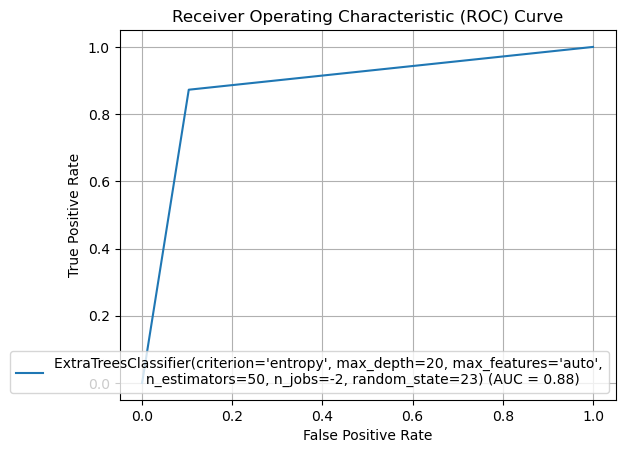

In [112]:
fpr,tpr, thresholds=metrics.roc_curve(y_test,prediction)
roc_auc=metrics.auc(fpr,tpr)
disp=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
disp.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

#### Saving the Model

In [113]:
file='Insurance_Fraud_Detection.pkl'
pickle.dump(final_model,open(file,'wb'))